In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import rcParams, cycler

# Data vizualization

In [3]:
df_2019 = pd.read_csv('tr_endutih_hogar_anual_2019.csv')

In [4]:
#Se obtiene el total de hogares encuestados en 2019
total_2019=len(df_2019.HOGAR)
#Se obtiene el total de hogares encuestadados en 2019 que solo tenían contratado el paquete tripleplay integrado
df_triple_2019=df_2019[(df_2019.P5_7_2==1) & (df_2019.P5_7_3!=1) & (df_2019.P5_7_4!=1) & (df_2019.P5_7_5!=1) & (df_2019.P5_7_6!=1) & (df_2019.P5_7_7!=1) & (df_2019.P5_7_8!=1)]
triple_2019=len(df_triple_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que solo tenían contratado el paquete (STAR+STF) 
df_doble_STAR_STF_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3==1) & (df_2019.P5_7_4!=1) & (df_2019.P5_7_5!=1) & (df_2019.P5_7_6!=1) & (df_2019.P5_7_7!=1) & (df_2019.P5_7_8!=1) ]
doble_STAR_STF_2019=len(df_doble_STAR_STF_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que solo tenían contratado el paquete (STAR+SBAF) 
df_doble_STAR_SBAF_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3!=1) & (df_2019.P5_7_4==1) & (df_2019.P5_7_5!=1) & (df_2019.P5_7_6!=1) & (df_2019.P5_7_7!=1) & (df_2019.P5_7_8!=1) ]
doble_STAR_SBAF_2019=len(df_doble_STAR_SBAF_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que solo tenían contratado el paquete (STF+SBAF) 
df_doble_STF_SBAF_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3!=1) & (df_2019.P5_7_4!=1) & (df_2019.P5_7_5==1) & (df_2019.P5_7_6!=1) & (df_2019.P5_7_7!=1) & (df_2019.P5_7_8!=1) ]
doble_STF_SBAF_2019=len(df_doble_STF_SBAF_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que solo tenían contratado el paquete (STAR) 
df_STAR_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3!=1) & (df_2019.P5_7_4!=1) & (df_2019.P5_7_5!=1) & (df_2019.P5_7_6==1) & (df_2019.P5_7_7!=1) & (df_2019.P5_7_8!=1) ]
STAR_2019=len(df_STAR_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que solo tenían contratado el paquete (STF) 
df_STF_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3!=1) & (df_2019.P5_7_4!=1) & (df_2019.P5_7_5!=1) & (df_2019.P5_7_6!=1) & (df_2019.P5_7_7==1) & (df_2019.P5_7_8!=1) ]
STF_2019=len(df_STF_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que solo tenían contratado el paquete (SBAF) 
df_SBAF_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3!=1) & (df_2019.P5_7_4!=1) & (df_2019.P5_7_5!=1) & (df_2019.P5_7_6!=1) & (df_2019.P5_7_7!=1) & (df_2019.P5_7_8==1)]
SBAF_2019=len(df_SBAF_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que no tenían ningún servicio contratado de telecomunicaciones fijas  
df_Ningun_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3!=1) & (df_2019.P5_7_4!=1) & (df_2019.P5_7_5!=1) & (df_2019.P5_7_6!=1) & (df_2019.P5_7_7!=1) & (df_2019.P5_7_8!=1)]
Ningun_2019=len(df_Ningun_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que solo tenían contratado el paquete sintético (STAR)+(SBAF) 
df_STAR_SBAF_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3!=1) & (df_2019.P5_7_4!=1) & (df_2019.P5_7_5!=1) & (df_2019.P5_7_6==1) & (df_2019.P5_7_7!=1) & (df_2019.P5_7_8==1)]
STAR_SBAF_2019=len(df_STAR_SBAF_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que solo tenían contratado el paquete sintético (SBAF)+(STF) 
df_SBAF_STF_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3!=1) & (df_2019.P5_7_4!=1) & (df_2019.P5_7_5!=1) & (df_2019.P5_7_6!=1) & (df_2019.P5_7_7==1) & (df_2019.P5_7_8==1)]
SBAF_STF_2019=len(df_SBAF_STF_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que solo tenían contratado el paquete sintético (STF)+(SBAF+STAR) 
df_STF_doble_SBAF_STAR_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3!=1) & (df_2019.P5_7_4==1) & (df_2019.P5_7_5!=1) & (df_2019.P5_7_6!=1) & (df_2019.P5_7_7==1) & (df_2019.P5_7_8!=1)]
STF_doble_SBAF_STAR_2019=len(df_STF_doble_SBAF_STAR_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que solo tenían contratado el paquete sintético (STAR)+(SBAF+STF)
df_STAR_doble_SBAF_STF_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3!=1) & (df_2019.P5_7_4!=1) & (df_2019.P5_7_5==1) & (df_2019.P5_7_6==1) & (df_2019.P5_7_7!=1) & (df_2019.P5_7_8!=1)]
STAR_doble_SBAF_STF_2019=len(df_STAR_doble_SBAF_STF_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que solo tenían contratado el paquete sintético (SBAF)+(STAR+STF)
df_SBAF_doble_STAR_STF_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3==1) & (df_2019.P5_7_4!=1) & (df_2019.P5_7_5!=1) & (df_2019.P5_7_6!=1) & (df_2019.P5_7_7!=1) & (df_2019.P5_7_8==1)]
SBAF_doble_STAR_STF_2019=len(df_SBAF_doble_STAR_STF_2019.HOGAR)
##Se obtiene el total de hogares encuestados en 2019 que solo tenían contratado el paquete sintético (STF)+(SBAF)+(STAR)
df_SBAF_STAR_STF_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3!=1) & (df_2019.P5_7_4!=1) & (df_2019.P5_7_5!=1) & (df_2019.P5_7_6==1) & (df_2019.P5_7_7==1) & (df_2019.P5_7_8==1)]
SBAF_STAR_STF_2019=len(df_SBAF_STAR_STF_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que solo tenían contratado el paquete sintético (STF)+(STAR)
df_STAR_STF_2019=df_2019[(df_2019.P5_7_2!=1) & (df_2019.P5_7_3!=1) & (df_2019.P5_7_4!=1) & (df_2019.P5_7_5!=1) & (df_2019.P5_7_6==1) & (df_2019.P5_7_7==1) & (df_2019.P5_7_8!=1)]
STAR_STF_2019=len(df_STAR_STF_2019.HOGAR)
#Se obtiene el total de hogares encuestados en 2019 que tenían contratado paquetes sintéticos atípicos que cuentan con los tres servicios
combinaciones_2019=total_2019-SBAF_2019-STF_2019-STAR_2019-triple_2019-doble_STF_SBAF_2019-doble_STAR_SBAF_2019-doble_STAR_STF_2019-SBAF_STAR_STF_2019-SBAF_STF_2019-STAR_SBAF_2019-STAR_STF_2019-SBAF_doble_STAR_STF_2019-STAR_doble_SBAF_STF_2019-STF_doble_SBAF_STAR_2019-Ningun_2019
#Se obtiene el total de hogares que disponen conexión a internet en el hogar, ya sea fija o móvil
df_conexion_2019=df_2019[df_2019.P4_4==1]
conexion_2019=len(df_conexion_2019.HOGAR)
#Se obtiene el total de hogares que disponen de telefono móvil
df_movil_2019=df_2019[df_2019.P4_1_5==1]
movil_2019=len(df_movil_2019.HOGAR)

In [5]:
#Se abren los microdatos de la ENDUTIH 2018 de la base de hogares
df_2018 = pd.read_csv('tic_2018_hogares.csv',encoding='latin-1')

In [6]:
#Se obtiene el total de hogares encuestados en 2018
total_2018=len(df_2018.HOGAR)
#Se obtiene el total de hogares encuestadados en 2018 que solo tenían contratado el paquete tripleplay integrado
df_triple_2018=df_2018[(df_2018.P5_6_1==1) & (df_2018.P5_6_2!=1) & (df_2018.P5_6_3!=1) & (df_2018.P5_6_4!=1) & (df_2018.P5_6_5!=1) & (df_2018.P5_6_6!=1) & (df_2018.P5_6_7!=1)]
triple_2018=len(df_triple_2018.HOGAR)
#Se obtiene el total de hogares encuestados en 2018 que solo tenían contratado el paquete (STAR+STF) 
df_doble_STAR_STF_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2==1) & (df_2018.P5_6_3!=1) & (df_2018.P5_6_4!=1) & (df_2018.P5_6_5!=1) & (df_2018.P5_6_6!=1) & (df_2018.P5_6_7!=1)]
doble_STAR_STF_2018=len(df_doble_STAR_STF_2018.HOGAR)
#Se obtiene el total de hogares encuestados en 2018 que solo tenían contratado el paquete (STAR+SBAF)
df_doble_STAR_SBAF_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2!=1) & (df_2018.P5_6_3==1) & (df_2018.P5_6_4!=1) & (df_2018.P5_6_5!=1) & (df_2018.P5_6_6!=1) & (df_2018.P5_6_7!=1)]
doble_STAR_SBAF_2018=len(df_doble_STAR_SBAF_2018.HOGAR)
#Se obtiene el total de hogares encuestados en 2018 que solo tenían contratado el paquete (STF+SBAF)
df_doble_STF_SBAF_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2!=1) & (df_2018.P5_6_3!=1) & (df_2018.P5_6_4==1) & (df_2018.P5_6_5!=1) & (df_2018.P5_6_6!=1) & (df_2018.P5_6_7!=1)]
doble_STF_SBAF_2018=len(df_doble_STF_SBAF_2018.HOGAR)
#Se obtiene el total de hogares encuestados en 2018 que solo tenían contratado el paquete (STAR) 
df_STAR_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2!=1) & (df_2018.P5_6_3!=1) & (df_2018.P5_6_4!=1) & (df_2018.P5_6_5==1) & (df_2018.P5_6_6!=1) & (df_2018.P5_6_7!=1)]
STAR_2018=len(df_STAR_2018.HOGAR)
#Se obtiene el total de hogares encuestados en 2018 que solo tenían contratado el paquete (STF) 
df_STF_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2!=1) & (df_2018.P5_6_3!=1) & (df_2018.P5_6_4!=1) & (df_2018.P5_6_5!=1) & (df_2018.P5_6_6==1) & (df_2018.P5_6_7!=1)]
STF_2018=len(df_STF_2018.HOGAR)
#Se obtiene el total de hogares encuestados en 2018 que solo tenían contratado el paquete (SBAF) 
df_SBAF_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2!=1) & (df_2018.P5_6_3!=1) & (df_2018.P5_6_4!=1) & (df_2018.P5_6_5!=1) & (df_2018.P5_6_6!=1) & (df_2018.P5_6_7==1)]
SBAF_2018=len(df_SBAF_2018.HOGAR)
#Se obtiene el total de hogares encuestados en 2018 que no tenían ningún servicio contratado de telecomunicaciones fijas  
df_Ningun_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2!=1) & (df_2018.P5_6_3!=1) & (df_2018.P5_6_4!=1) & (df_2018.P5_6_5!=1) & (df_2018.P5_6_6!=1) & (df_2018.P5_6_7!=1)]
Ningun_2018=len(df_Ningun_2018.HOGAR)
#Se obtiene el total de hogares encuestados en 2018 que solo tenían contratado el paquete sintético (STAR)+(SBAF) 
df_STAR_SBAF_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2!=1) & (df_2018.P5_6_3!=1) & (df_2018.P5_6_4!=1) & (df_2018.P5_6_5==1) & (df_2018.P5_6_6!=1) & (df_2018.P5_6_7==1)]
STAR_SBAF_2018=len(df_STAR_SBAF_2018.HOGAR)
#Se obtiene el total de hogares encuestados en 2018 que solo tenían contratado el paquete sintético (SBAF)+(STF) 
df_SBAF_STF_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2!=1) & (df_2018.P5_6_3!=1) & (df_2018.P5_6_4!=1) & (df_2018.P5_6_5!=1) & (df_2018.P5_6_6==1) & (df_2018.P5_6_7==1)]
SBAF_STF_2018=len(df_SBAF_STF_2018.HOGAR)
#Se obtiene el total de hogares encuestados en 2018 que solo tenían contratado el paquete sintético (STF)+(SBAF+STAR) 
df_STF_doble_SBAF_STAR_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2!=1) & (df_2018.P5_6_3==1) & (df_2018.P5_6_4!=1) & (df_2018.P5_6_5!=1) & (df_2018.P5_6_6==1) & (df_2018.P5_6_7!=1)]
STF_doble_SBAF_STAR_2018=len(df_STF_doble_SBAF_STAR_2018.HOGAR)
#Se obtiene el total de hogares encuestados en 2018 que solo tenían contratado el paquete sintético (STAR)+(SBAF+STF)
df_STAR_doble_SBAF_STF_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2!=1) & (df_2018.P5_6_3!=1) & (df_2018.P5_6_4==1) & (df_2018.P5_6_5==1) & (df_2018.P5_6_6!=1) & (df_2018.P5_6_7!=1)]
STAR_doble_SBAF_STF_2018=len(df_STAR_doble_SBAF_STF_2018.HOGAR)
#Se obtiene el total de hogares encuestados en 2018 que solo tenían contratado el paquete sintético (SBAF)+(STAR+STF)
df_SBAF_doble_STAR_STF_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2==1) & (df_2018.P5_6_3!=1) & (df_2018.P5_6_4!=1) & (df_2018.P5_6_5!=1) & (df_2018.P5_6_6!=1) & (df_2018.P5_6_7==1)]
SBAF_doble_STAR_STF_2018=len(df_SBAF_doble_STAR_STF_2018)
#Se obtiene el total de hogares encuestados en 2018 que solo tenían contratado el paquete sintético (STF)+(SBAF)+(STAR)
df_SBAF_STAR_STF_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2!=1) & (df_2018.P5_6_3!=1) & (df_2018.P5_6_4!=1) & (df_2018.P5_6_5==1) & (df_2018.P5_6_6==1) & (df_2018.P5_6_7==1)]
SBAF_STAR_STF_2018=len(df_SBAF_STAR_STF_2018)
#Se obtiene el total de hogares encuestados en 2018 que solo tenían contratado el paquete sintético (STF)+(STAR)
df_STAR_STF_2018=df_2018[(df_2018.P5_6_1!=1) & (df_2018.P5_6_2!=1) & (df_2018.P5_6_3!=1) & (df_2018.P5_6_4!=1) & (df_2018.P5_6_5==1) & (df_2018.P5_6_6==1) & (df_2018.P5_6_7!=1)]
STAR_STF_2018=len(df_STAR_STF_2018)
#Se obtiene el total de hogares encuestados en 2018 que tenían contratado paquetes sintéticos atípicos que cuentan con los tres servicios
combinaciones_2018=total_2018-SBAF_2018-STF_2018-STAR_2018-triple_2018-doble_STF_SBAF_2018-doble_STAR_SBAF_2018-doble_STAR_STF_2018-SBAF_STAR_STF_2018-SBAF_STF_2018-STAR_SBAF_2018-STAR_STF_2018-SBAF_doble_STAR_STF_2018-STAR_doble_SBAF_STF_2018-STF_doble_SBAF_STAR_2018-Ningun_2018
#Se obtiene el total de hogares que disponen conexión a internet en el hogar, ya sea fija o móvil
df_conexion_2018=df_2018[df_2018.P4_4==1]
conexion_2018=len(df_conexion_2018)
#Se obtiene el total de hogares que disponen de teléfono móvil
df_movil_2018=df_2018[df_2018.P4_1_5==1]
movil_2018=len(df_movil_2018)

In [7]:
#Se abren los microdatos de la ENDUTIH 2017 de la base de hogares
df_2017 = pd.read_csv('TIC_2017_hogares.csv',encoding='latin-1')

In [8]:
#Se obtiene el total de hogares encuestados en 2017
total_2017=len(df_2017.HOGAR)
#Se obtiene el total de hogares encuestadados en 2017 que solo tenían contratado el paquete tripleplay integrado
df_triple_2017=df_2017[(df_2017.P5_6_1==1) & (df_2017.P5_6_2!=1) & (df_2017.P5_6_3!=1) & (df_2017.P5_6_4!=1) & (df_2017.P5_6_5!=1) & (df_2017.P5_6_6!=1) & (df_2017.P5_6_7!=1)]
triple_2017=len(df_triple_2017.HOGAR)
#Se obtiene el total de hogares encuestados en 2017 que solo tenían contratado el paquete (STAR+STF) 
df_doble_STAR_STF_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2==1) & (df_2017.P5_6_3!=1) & (df_2017.P5_6_4!=1) & (df_2017.P5_6_5!=1) & (df_2017.P5_6_6!=1) & (df_2017.P5_6_7!=1)]
doble_STAR_STF_2017=len(df_doble_STAR_STF_2017.HOGAR)
#Se obtiene el total de hogares encuestados en 2017 que solo tenían contratado el paquete (STAR+SBAF)
df_doble_STAR_SBAF_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2!=1) & (df_2017.P5_6_3==1) & (df_2017.P5_6_4!=1) & (df_2017.P5_6_5!=1) & (df_2017.P5_6_6!=1) & (df_2017.P5_6_7!=1)]
doble_STAR_SBAF_2017=len(df_doble_STAR_SBAF_2017.HOGAR)
#Se obtiene el total de hogares encuestados en 2017 que solo tenían contratado el paquete (STF+SBAF)
df_doble_STF_SBAF_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2!=1) & (df_2017.P5_6_3!=1) & (df_2017.P5_6_4==1) & (df_2017.P5_6_5!=1) & (df_2017.P5_6_6!=1) & (df_2017.P5_6_7!=1)]
doble_STF_SBAF_2017=len(df_doble_STF_SBAF_2017.HOGAR)
#Se obtiene el total de hogares encuestados en 2017 que solo tenían contratado el paquete (STAR) 
df_STAR_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2!=1) & (df_2017.P5_6_3!=1) & (df_2017.P5_6_4!=1) & (df_2017.P5_6_5==1) & (df_2017.P5_6_6!=1) & (df_2017.P5_6_7!=1)]
STAR_2017=len(df_STAR_2017.HOGAR)
#Se obtiene el total de hogares encuestados en 2017 que solo tenían contratado el paquete (STF) 
df_STF_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2!=1) & (df_2017.P5_6_3!=1) & (df_2017.P5_6_4!=1) & (df_2017.P5_6_5!=1) & (df_2017.P5_6_6==1) & (df_2017.P5_6_7!=1)]
STF_2017=len(df_STF_2017.HOGAR)
#Se obtiene el total de hogares encuestados en 2017 que solo tenían contratado el paquete (SBAF) 
df_SBAF_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2!=1) & (df_2017.P5_6_3!=1) & (df_2017.P5_6_4!=1) & (df_2017.P5_6_5!=1) & (df_2017.P5_6_6!=1) & (df_2017.P5_6_7==1)]
SBAF_2017=len(df_SBAF_2017.HOGAR)
#Se obtiene el total de hogares encuestados en 2017 que no tenían ningún servicio contratado de telecomunicaciones fijas  
df_Ningun_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2!=1) & (df_2017.P5_6_3!=1) & (df_2017.P5_6_4!=1) & (df_2017.P5_6_5!=1) & (df_2017.P5_6_6!=1) & (df_2017.P5_6_7!=1)]
Ningun_2017=len(df_Ningun_2017.HOGAR)
#Se obtiene el total de hogares encuestados en 2017 que solo tenían contratado el paquete sintético (STAR)+(SBAF) 
df_STAR_SBAF_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2!=1) & (df_2017.P5_6_3!=1) & (df_2017.P5_6_4!=1) & (df_2017.P5_6_5==1) & (df_2017.P5_6_6!=1) & (df_2017.P5_6_7==1)]
STAR_SBAF_2017=len(df_STAR_SBAF_2017.HOGAR)
#Se obtiene el total de hogares encuestados en 2017 que solo tenían contratado el paquete sintético (SBAF)+(STF) 
df_SBAF_STF_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2!=1) & (df_2017.P5_6_3!=1) & (df_2017.P5_6_4!=1) & (df_2017.P5_6_5!=1) & (df_2017.P5_6_6==1) & (df_2017.P5_6_7==1)]
SBAF_STF_2017=len(df_SBAF_STF_2017.HOGAR)
#Se obtiene el total de hogares encuestados en 2017 que solo tenían contratado el paquete sintético (STF)+(SBAF+STAR) 
df_STF_doble_SBAF_STAR_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2!=1) & (df_2017.P5_6_3==1) & (df_2017.P5_6_4!=1) & (df_2017.P5_6_5!=1) & (df_2017.P5_6_6==1) & (df_2017.P5_6_7!=1)]
STF_doble_SBAF_STAR_2017=len(df_STF_doble_SBAF_STAR_2017.HOGAR)
#Se obtiene el total de hogares encuestados en 2017 que solo tenían contratado el paquete sintético (STAR)+(SBAF+STF)
df_STAR_doble_SBAF_STF_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2!=1) & (df_2017.P5_6_3!=1) & (df_2017.P5_6_4==1) & (df_2017.P5_6_5==1) & (df_2017.P5_6_6!=1) & (df_2017.P5_6_7!=1)]
STAR_doble_SBAF_STF_2017=len(df_STAR_doble_SBAF_STF_2017.HOGAR)
#Se obtiene el total de hogares encuestados en 2017 que solo tenían contratado el paquete sintético (SBAF)+(STAR+STF)
df_SBAF_doble_STAR_STF_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2==1) & (df_2017.P5_6_3!=1) & (df_2017.P5_6_4!=1) & (df_2017.P5_6_5!=1) & (df_2017.P5_6_6!=1) & (df_2017.P5_6_7==1)]
SBAF_doble_STAR_STF_2017=len(df_SBAF_doble_STAR_STF_2017)
#Se obtiene el total de hogares encuestados en 2017 que solo tenían contratado el paquete sintético (STF)+(SBAF)+(STAR)
df_SBAF_STAR_STF_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2!=1) & (df_2017.P5_6_3!=1) & (df_2017.P5_6_4!=1) & (df_2017.P5_6_5==1) & (df_2017.P5_6_6==1) & (df_2017.P5_6_7==1)]
SBAF_STAR_STF_2017=len(df_SBAF_STAR_STF_2017)
#Se obtiene el total de hogares encuestados en 2017 que solo tenían contratado el paquete sintético (STF)+(STAR)
df_STAR_STF_2017=df_2017[(df_2017.P5_6_1!=1) & (df_2017.P5_6_2!=1) & (df_2017.P5_6_3!=1) & (df_2017.P5_6_4!=1) & (df_2017.P5_6_5==1) & (df_2017.P5_6_6==1) & (df_2017.P5_6_7!=1)]
STAR_STF_2017=len(df_STAR_STF_2017)
#Se obtiene el total de hogares encuestados en 2017 que tenían contratado paquetes sintéticos atípicos que cuentan con los tres servicios
combinaciones_2017=total_2017-SBAF_2017-STF_2017-STAR_2017-triple_2017-doble_STF_SBAF_2017-doble_STAR_SBAF_2017-doble_STAR_STF_2017-SBAF_STAR_STF_2017-SBAF_STF_2017-STAR_SBAF_2017-STAR_STF_2017-SBAF_doble_STAR_STF_2017-STAR_doble_SBAF_STF_2017-STF_doble_SBAF_STAR_2017-Ningun_2017
#Se obtiene el total de hogares que disponen conexión a internet en el hogar, ya sea fija o móvil
df_conexion_2017=df_2017[df_2017.P4_4==1]
conexion_2017=len(df_conexion_2017)
#Se obtiene el total de hogares que disponen de telefonía móvil
df_movil_2017=df_2017[df_2017.P4_1_5==1]
movil_2017=len(df_movil_2017)

In [9]:
#Se abren los microdatos de la ENDUTIH 2016 de la base de hogares
df_2016 = pd.read_csv('TIC_2016_HOGARES.csv',encoding='latin-1')

In [10]:
#Se obtiene el total de hogares encuestados en 2016
total_2016=len(df_2016.HOGAR)
#Se obtiene el total de hogares encuestadados en 2016 que solo tenían contratado el paquete tripleplay integrado
df_triple_2016=df_2016[(df_2016.P5_2_1_1==1) & (df_2016.P5_2_2_1!=1) & (df_2016.P5_2_3_1!=1) & (df_2016.P5_2_4_1!=1) & (df_2016.P5_2A_1_1!=1) & (df_2016.P5_2A_2_1!=1) & (df_2016.P5_2A_3_1!=1)]
triple_2016=len(df_triple_2016.HOGAR)
#Se obtiene el total de hogares encuestados en 2016 que solo tenían contratado el paquete (STAR+STF) 
df_doble_STAR_STF_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1==1) & (df_2016.P5_2_3_1!=1) & (df_2016.P5_2_4_1!=1) & (df_2016.P5_2A_1_1!=1) & (df_2016.P5_2A_2_1!=1) & (df_2016.P5_2A_3_1!=1)]
doble_STAR_STF_2016=len(df_doble_STAR_STF_2016.HOGAR)
#Se obtiene el total de hogares encuestados en 2016 que solo tenían contratado el paquete (STAR+SBAF)
df_doble_STAR_SBAF_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1!=1) & (df_2016.P5_2_3_1==1) & (df_2016.P5_2_4_1!=1) & (df_2016.P5_2A_1_1!=1) & (df_2016.P5_2A_2_1!=1) & (df_2016.P5_2A_3_1!=1)]
doble_STAR_SBAF_2016=len(df_doble_STAR_SBAF_2016.HOGAR)
#Se obtiene el total de hogares encuestados en 2016 que solo tenían contratado el paquete (STF+SBAF)
df_doble_STF_SBAF_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1!=1) & (df_2016.P5_2_3_1!=1) & (df_2016.P5_2_4_1==1) & (df_2016.P5_2A_1_1!=1) & (df_2016.P5_2A_2_1!=1) & (df_2016.P5_2A_3_1!=1)]
doble_STF_SBAF_2016=len(df_doble_STF_SBAF_2016.HOGAR)
#Se obtiene el total de hogares encuestados en 2016 que solo tenían contratado el paquete (STAR) 
df_STAR_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1!=1) & (df_2016.P5_2_3_1!=1) & (df_2016.P5_2_4_1!=1) & (df_2016.P5_2A_1_1==1) & (df_2016.P5_2A_2_1!=1) & (df_2016.P5_2A_3_1!=1)]
STAR_2016=len(df_STAR_2016.HOGAR)
#Se obtiene el total de hogares encuestados en 2016 que solo tenían contratado el paquete (STF) 
df_STF_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1!=1) & (df_2016.P5_2_3_1!=1) & (df_2016.P5_2_4_1!=1) & (df_2016.P5_2A_1_1!=1) & (df_2016.P5_2A_2_1!=1) & (df_2016.P5_2A_3_1==1)]
STF_2016=len(df_STF_2016.HOGAR)
#Se obtiene el total de hogares encuestados en 2016 que solo tenían contratado el paquete (SBAF) 
df_SBAF_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1!=1) & (df_2016.P5_2_3_1!=1) & (df_2016.P5_2_4_1!=1) & (df_2016.P5_2A_1_1!=1) & (df_2016.P5_2A_2_1==1) & (df_2016.P5_2A_3_1!=1)]
SBAF_2016=len(df_SBAF_2016.HOGAR)
#Se obtiene el total de hogares encuestados en 2016 que no tenían ningún servicio contratado de telecomunicaciones fijas  
df_Ningun_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1!=1) & (df_2016.P5_2_3_1!=1) & (df_2016.P5_2_4_1!=1) & (df_2016.P5_2A_1_1!=1) & (df_2016.P5_2A_2_1!=1) & (df_2016.P5_2A_3_1!=1)]
Ningun_2016=len(df_Ningun_2016.HOGAR)
#Se obtiene el total de hogares encuestados en 2016 que solo tenían contratado el paquete sintético (STAR)+(SBAF) 
df_STAR_SBAF_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1!=1) & (df_2016.P5_2_3_1!=1) & (df_2016.P5_2_4_1!=1) & (df_2016.P5_2A_1_1==1) & (df_2016.P5_2A_2_1==1) & (df_2016.P5_2A_3_1!=1)]
STAR_SBAF_2016=len(df_STAR_SBAF_2016.HOGAR)
#Se obtiene el total de hogares encuestados en 2016 que solo tenían contratado el paquete sintético (SBAF)+(STF) 
df_SBAF_STF_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1!=1) & (df_2016.P5_2_3_1!=1) & (df_2016.P5_2_4_1!=1) & (df_2016.P5_2A_1_1!=1) & (df_2016.P5_2A_2_1==1) & (df_2016.P5_2A_3_1==1)]
SBAF_STF_2016=len(df_SBAF_STF_2016.HOGAR)
#Se obtiene el total de hogares encuestados en 2016 que solo tenían contratado el paquete sintético (STF)+(SBAF+STAR) 
df_STF_doble_SBAF_STAR_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1!=1) & (df_2016.P5_2_3_1==1) & (df_2016.P5_2_4_1!=1) & (df_2016.P5_2A_1_1!=1) & (df_2016.P5_2A_2_1!=1) & (df_2016.P5_2A_3_1==1)]
STF_doble_SBAF_STAR_2016=len(df_STF_doble_SBAF_STAR_2016.HOGAR)
#Se obtiene el total de hogares encuestados en 2016 que solo tenían contratado el paquete sintético (STAR)+(SBAF+STF)
df_STAR_doble_SBAF_STF_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1!=1) & (df_2016.P5_2_3_1!=1) & (df_2016.P5_2_4_1==1) & (df_2016.P5_2A_1_1==1) & (df_2016.P5_2A_2_1!=1) & (df_2016.P5_2A_3_1!=1)]
STAR_doble_SBAF_STF_2016=len(df_STAR_doble_SBAF_STF_2016.HOGAR)
#Se obtiene el total de hogares encuestados en 2016 que solo tenían contratado el paquete sintético (SBAF)+(STAR+STF)
df_SBAF_doble_STAR_STF_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1==1) & (df_2016.P5_2_3_1!=1) & (df_2016.P5_2_4_1!=1) & (df_2016.P5_2A_1_1!=1) & (df_2016.P5_2A_2_1==1) & (df_2016.P5_2A_3_1!=1)]
SBAF_doble_STAR_STF_2016=len(df_SBAF_doble_STAR_STF_2016)
#Se obtiene el total de hogares encuestados en 2016 que solo tenían contratado el paquete sintético (STF)+(SBAF)+(STAR)
df_SBAF_STAR_STF_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1!=1) & (df_2016.P5_2_3_1!=1) & (df_2016.P5_2_4_1!=1) & (df_2016.P5_2A_1_1==1) & (df_2016.P5_2A_2_1==1) & (df_2016.P5_2A_3_1==1)]
SBAF_STAR_STF_2016=len(df_SBAF_STAR_STF_2016)
#Se obtiene el total de hogares encuestados en 2016 que solo tenían contratado el paquete sintético (STF)+(STAR)
df_STAR_STF_2016=df_2016[(df_2016.P5_2_1_1!=1) & (df_2016.P5_2_2_1!=1) & (df_2016.P5_2_3_1!=1) & (df_2016.P5_2_4_1!=1) & (df_2016.P5_2A_1_1==1) & (df_2016.P5_2A_2_1!=1) & (df_2016.P5_2A_3_1==1)]
STAR_STF_2016=len(df_STAR_STF_2016)
#Se obtiene el total de hogares encuestados en 2016 que tenían contratado paquetes sintéticos atípicos que cuentan con los tres servicios
combinaciones_2016=total_2016-SBAF_2016-STF_2016-STAR_2016-triple_2016-doble_STF_SBAF_2016-doble_STAR_SBAF_2016-doble_STAR_STF_2016-SBAF_STAR_STF_2016-SBAF_STF_2016-STAR_SBAF_2016-STAR_STF_2016-SBAF_doble_STAR_STF_2016-STAR_doble_SBAF_STF_2016-STF_doble_SBAF_STAR_2016-Ningun_2016
#Se obtiene el total de hogares que disponen conexión a internet en el hogar, ya sea fija o móvil
df_conexion_2016=df_2016[df_2016.P4_5==1]
conexion_2016=len(df_conexion_2016)
#Se obtiene el total de hogares que disponen de telefonía móvil
df_movil_2016=df_2016[df_2016.P4_1_5==1]
movil_2016=len(df_movil_2016)

In [11]:
#Se abren los microdatos de la ENDUTIH 2015 de la base de hogares
df_2015 = pd.read_csv('TIC_2015_HOGARES.csv',encoding='latin-1')

In [12]:
#Se obtiene el total de hogares encuestados en 2015
total_2015=len(df_2015.HOGAR)
#Se obtiene el total de hogares encuestadados en 2015 que solo tenían contratado el paquete tripleplay integrado
df_triple_2015=df_2015[(df_2015.P5_1_1==1) & (df_2015.P5_1_2!=1) & (df_2015.P5_1_3!=1) & (df_2015.P5_1_6!=1) & (df_2015.P5_1_4!=1) & (df_2015.P5_1_5!=1) & (df_2015.P5_1_7!=1)]
triple_2015=len(df_triple_2015.HOGAR)
#Se obtiene el total de hogares encuestados en 2015 que solo tenían contratado el paquete (STAR+STF) 
df_doble_STAR_STF_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2==1) & (df_2015.P5_1_3!=1) & (df_2015.P5_1_6!=1) & (df_2015.P5_1_4!=1) & (df_2015.P5_1_5!=1) & (df_2015.P5_1_7!=1)]
doble_STAR_STF_2015=len(df_doble_STAR_STF_2015.HOGAR)
#Se obtiene el total de hogares encuestados en 2015 que solo tenían contratado el paquete (STAR+SBAF)
df_doble_STAR_SBAF_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2!=1) & (df_2015.P5_1_3==1) & (df_2015.P5_1_6!=1) & (df_2015.P5_1_4!=1) & (df_2015.P5_1_5!=1) & (df_2015.P5_1_7!=1)]
doble_STAR_SBAF_2015=len(df_doble_STAR_SBAF_2015.HOGAR)
#Se obtiene el total de hogares encuestados en 2015 que solo tenían contratado el paquete (STF+SBAF)
df_doble_STF_SBAF_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2!=1) & (df_2015.P5_1_3!=1) & (df_2015.P5_1_6==1) & (df_2015.P5_1_4!=1) & (df_2015.P5_1_5!=1) & (df_2015.P5_1_7!=1)]
doble_STF_SBAF_2015=len(df_doble_STF_SBAF_2015.HOGAR)
#Se obtiene el total de hogares encuestados en 2015 que solo tenían contratado el paquete (STAR) 
df_STAR_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2!=1) & (df_2015.P5_1_3!=1) & (df_2015.P5_1_6!=1) & (df_2015.P5_1_4==1) & (df_2015.P5_1_5!=1) & (df_2015.P5_1_7!=1)]
STAR_2015=len(df_STAR_2015.HOGAR)
#Se obtiene el total de hogares encuestados en 2015 que solo tenían contratado el paquete (STF) 
df_STF_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2!=1) & (df_2015.P5_1_3!=1) & (df_2015.P5_1_6!=1) & (df_2015.P5_1_4!=1) & (df_2015.P5_1_5!=1) & (df_2015.P5_1_7==1)]
STF_2015=len(df_STF_2015.HOGAR)
#Se obtiene el total de hogares encuestados en 2015 que solo tenían contratado el paquete (SBAF) 
df_SBAF_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2!=1) & (df_2015.P5_1_3!=1) & (df_2015.P5_1_6!=1) & (df_2015.P5_1_4!=1) & (df_2015.P5_1_5==1) & (df_2015.P5_1_7!=1)]
SBAF_2015=len(df_SBAF_2015.HOGAR)
#Se obtiene el total de hogares encuestados en 2015 que no tenían ningún servicio contratado de telecomunicaciones fijas  
df_Ningun_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2!=1) & (df_2015.P5_1_3!=1) & (df_2015.P5_1_6!=1) & (df_2015.P5_1_4!=1) & (df_2015.P5_1_5!=1) & (df_2015.P5_1_7!=1)]
Ningun_2015=len(df_Ningun_2015.HOGAR)
#Se obtiene el total de hogares encuestados en 2015 que solo tenían contratado el paquete sintético (STAR)+(SBAF) 
df_STAR_SBAF_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2!=1) & (df_2015.P5_1_3!=1) & (df_2015.P5_1_6!=1) & (df_2015.P5_1_4==1) & (df_2015.P5_1_5==1) & (df_2015.P5_1_7!=1)]
STAR_SBAF_2015=len(df_STAR_SBAF_2015.HOGAR)
#Se obtiene el total de hogares encuestados en 2015 que solo tenían contratado el paquete sintético (SBAF)+(STF) 
df_SBAF_STF_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2!=1) & (df_2015.P5_1_3!=1) & (df_2015.P5_1_6!=1) & (df_2015.P5_1_4!=1) & (df_2015.P5_1_5==1) & (df_2015.P5_1_7==1)]
SBAF_STF_2015=len(df_SBAF_STF_2015.HOGAR)
#Se obtiene el total de hogares encuestados en 2015 que solo tenían contratado el paquete sintético (STF)+(SBAF+STAR) 
df_STF_doble_SBAF_STAR_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2!=1) & (df_2015.P5_1_3==1) & (df_2015.P5_1_6!=1) & (df_2015.P5_1_4!=1) & (df_2015.P5_1_5!=1) & (df_2015.P5_1_7==1)]
STF_doble_SBAF_STAR_2015=len(df_STF_doble_SBAF_STAR_2015.HOGAR)
#Se obtiene el total de hogares encuestados en 2015 que solo tenían contratado el paquete sintético (STAR)+(SBAF+STF)
df_STAR_doble_SBAF_STF_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2!=1) & (df_2015.P5_1_3!=1) & (df_2015.P5_1_6==1) & (df_2015.P5_1_4==1) & (df_2015.P5_1_5!=1) & (df_2015.P5_1_7!=1)]
STAR_doble_SBAF_STF_2015=len(df_STAR_doble_SBAF_STF_2015.HOGAR)
#Se obtiene el total de hogares encuestados en 2015 que solo tenían contratado el paquete sintético (SBAF)+(STAR+STF)
df_SBAF_doble_STAR_STF_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2==1) & (df_2015.P5_1_3!=1) & (df_2015.P5_1_6!=1) & (df_2015.P5_1_4!=1) & (df_2015.P5_1_5==1) & (df_2015.P5_1_7!=1)]
SBAF_doble_STAR_STF_2015=len(df_SBAF_doble_STAR_STF_2015)
#Se obtiene el total de hogares encuestados en 2015 que solo tenían contratado el paquete sintético (STF)+(SBAF)+(STAR)
df_SBAF_STAR_STF_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2!=1) & (df_2015.P5_1_3!=1) & (df_2015.P5_1_6!=1) & (df_2015.P5_1_4==1) & (df_2015.P5_1_5==1) & (df_2015.P5_1_7==1)]
SBAF_STAR_STF_2015=len(df_SBAF_STAR_STF_2015)
#Se obtiene el total de hogares encuestados en 2015 que solo tenían contratado el paquete sintético (STF)+(STAR)
df_STAR_STF_2015=df_2015[(df_2015.P5_1_1!=1) & (df_2015.P5_1_2!=1) & (df_2015.P5_1_3!=1) & (df_2015.P5_1_6!=1) & (df_2015.P5_1_4==1) & (df_2015.P5_1_5!=1) & (df_2015.P5_1_7==1)]
STAR_STF_2015=len(df_STAR_STF_2015)
#Se obtiene el total de hogares encuestados en 2015 que tenían contratado paquetes sintéticos atípicos que cuentan con los tres servicios
combinaciones_2015=total_2015-SBAF_2015-STF_2015-STAR_2015-triple_2015-doble_STF_SBAF_2015-doble_STAR_SBAF_2015-doble_STAR_STF_2015-SBAF_STAR_STF_2015-SBAF_STF_2015-STAR_SBAF_2015-STAR_STF_2015-SBAF_doble_STAR_STF_2015-STAR_doble_SBAF_STF_2015-STF_doble_SBAF_STAR_2015-Ningun_2015
#Se obtiene el total de hogares que disponen conexión a internet en el hogar, ya sea fija o móvil
df_conexion_2015=df_2015[df_2015.P4_5==1]
conexion_2015=len(df_conexion_2015)
#Se obtiene el total de hogares que disponen de telefonía móvil
df_movil_2015=df_2015[df_2015.P4_1_9==1]
movil_2015=len(df_movil_2015)

In [13]:
#Se arma un diccionario para posteriormente transfromarlo en un Dataframe
diccionario = {'Variables':['SBAF', 'STF', 'STAR', '[SBAF+STF+STAR]', '[SBAF+STF]', '[SBAF+STAR]', '[STAR+STF]', '[SBAF]+[STF]+[STAR]', '[SBAF]+[STF]', '[SBAF]+[STAR]','[STAR]+[STF]','[SBAF]+[STAR+STF]','[STAR]+[SBAF+STF]','[STF]+[STAR+SBAF]','Combinaciones atípicas de los 3 servicios','Ningún servicio contratado','Total de hogares encuestados','Conexión','Móvil'],'2015':[SBAF_2015,STF_2015,STAR_2015,triple_2015,doble_STF_SBAF_2015,doble_STAR_SBAF_2015,doble_STAR_STF_2015,SBAF_STAR_STF_2015,SBAF_STF_2015,STAR_SBAF_2015,STAR_STF_2015,SBAF_doble_STAR_STF_2015,STAR_doble_SBAF_STF_2015,STF_doble_SBAF_STAR_2015,combinaciones_2015,Ningun_2015,total_2015,conexion_2015,movil_2015],'2016':[SBAF_2016,STF_2016,STAR_2016,triple_2016,doble_STF_SBAF_2016,doble_STAR_SBAF_2016,doble_STAR_STF_2016,SBAF_STAR_STF_2016,SBAF_STF_2016,STAR_SBAF_2016,STAR_STF_2016,SBAF_doble_STAR_STF_2016,STAR_doble_SBAF_STF_2016,STF_doble_SBAF_STAR_2016,combinaciones_2016,Ningun_2016,total_2016,conexion_2016,movil_2016],'2017':[SBAF_2017,STF_2017,STAR_2017,triple_2017,doble_STF_SBAF_2017,doble_STAR_SBAF_2017,doble_STAR_STF_2017,SBAF_STAR_STF_2017,SBAF_STF_2017,STAR_SBAF_2017,STAR_STF_2017,SBAF_doble_STAR_STF_2017,STAR_doble_SBAF_STF_2017,STF_doble_SBAF_STAR_2017,combinaciones_2017,Ningun_2017,total_2017,conexion_2017,movil_2017], '2018':[SBAF_2018,STF_2018,STAR_2018,triple_2018,doble_STF_SBAF_2018,doble_STAR_SBAF_2018,doble_STAR_STF_2018,SBAF_STAR_STF_2018,SBAF_STF_2018,STAR_SBAF_2018,STAR_STF_2018,SBAF_doble_STAR_STF_2018,STAR_doble_SBAF_STF_2018,STF_doble_SBAF_STAR_2018,combinaciones_2018,Ningun_2018,total_2018,conexion_2018,movil_2018],'2019':[SBAF_2019,STF_2019,STAR_2019,triple_2019,doble_STF_SBAF_2019,doble_STAR_SBAF_2019,doble_STAR_STF_2019,SBAF_STAR_STF_2019,SBAF_STF_2019,STAR_SBAF_2019,STAR_STF_2019,SBAF_doble_STAR_STF_2019,STAR_doble_SBAF_STF_2019,STF_doble_SBAF_STAR_2019,combinaciones_2019,Ningun_2019,total_2019,conexion_2019,movil_2019]}

In [14]:
#A partir del diccionario creado se construye un Dataframe
tabla_anios=pd.DataFrame(diccionario)

In [15]:
tabla_anios

,Variables,2015,2016,2017,2018,2019
0,SBAF,3939,7977,12116,7026,1288
1,STF,4719,4097,4146,3855,512
2,STAR,11961,17984,18870,21341,3905
3,[SBAF+STF+STAR],6977,12036,13116,13977,2296
4,[SBAF+STF],5804,9618,12291,14537,2175
5,[SBAF+STAR],4633,9218,10522,13130,1510
6,[STAR+STF],618,895,629,576,57
7,[SBAF]+[STF]+[STAR],454,832,787,481,75
8,[SBAF]+[STF],303,486,695,361,54
9,[SBAF]+[STAR],2171,7294,8985,3062,646


In [16]:
#Se crea una columna para tener las cifras de 2015 en términos porcentuales respecto al total de hogares encuestados
tabla_anios['2015 %']=(tabla_anios['2015']/total_2015)*100
#Se crea una columna para tener las cifras de 2016 en términos porcentuales respecto al total de hogares encuestados
tabla_anios['2016 %']=(tabla_anios['2016']/total_2016)*100
#Se crea una columna para tener las cifras de 2017 en términos porcentuales respecto al total de hogares encuestados
tabla_anios['2017 %']=(tabla_anios['2017']/total_2017)*100
#Se crea una columna para tener las cifras de 2018 en términos porcentuales respecto al total de hogares encuestados
tabla_anios['2018 %']=(tabla_anios['2018']/total_2018)*100
#Se crea una columna para tener las cifras de 2019 en términos porcentuales respecto al total de hogares encuestados
tabla_anios['2019 %']=(tabla_anios['2019']/total_2019)*100

In [17]:
tabla_anios

,Variables,2015,2016,2017,2018,2019,2015 %,2016 %,2017 %,2018 %,2019 %
0,SBAF,3939,7977,12116,7026,1288,4.916069,6.705784,8.952202,5.253280,5.957447
1,STF,4719,4097,4146,3855,512,5.889548,3.444102,3.063373,2.882351,2.368178
2,STAR,11961,17984,18870,21341,3905,14.927925,15.118068,13.942560,15.956484,18.061980
3,[SBAF+STF+STAR],6977,12036,13116,13977,2296,8.707644,10.117942,9.691077,10.450484,10.619796
4,[SBAF+STF],5804,9618,12291,14537,2175,7.243682,8.085275,9.081505,10.869191,10.060130
5,[SBAF+STAR],4633,9218,10522,13130,1510,5.782215,7.749019,7.774436,9.817189,6.984274
6,[STAR+STF],618,895,629,576,57,0.771295,0.752373,0.464752,0.430670,0.263645
7,[SBAF]+[STF]+[STAR],454,832,787,481,75,0.566615,0.699412,0.581494,0.359640,0.346901
8,[SBAF]+[STF],303,486,695,361,54,0.378159,0.408551,0.513518,0.269917,0.249769
9,[SBAF]+[STAR],2171,7294,8985,3062,646,2.709516,6.131627,6.638786,2.289431,2.987974


In [18]:
#Se crea un nuevo dataframe solo con las variables porcentuales respecto al total de hogares encuestados
tabla_anios_perc=tabla_anios[['Variables','2015 %','2016 %','2017 %','2018 %','2019 %']][0:20]

In [19]:
tabla_anios_perc

,Variables,2015 %,2016 %,2017 %,2018 %,2019 %
0,SBAF,4.916069,6.705784,8.952202,5.253280,5.957447
1,STF,5.889548,3.444102,3.063373,2.882351,2.368178
2,STAR,14.927925,15.118068,13.942560,15.956484,18.061980
3,[SBAF+STF+STAR],8.707644,10.117942,9.691077,10.450484,10.619796
4,[SBAF+STF],7.243682,8.085275,9.081505,10.869191,10.060130
5,[SBAF+STAR],5.782215,7.749019,7.774436,9.817189,6.984274
6,[STAR+STF],0.771295,0.752373,0.464752,0.430670,0.263645
7,[SBAF]+[STF]+[STAR],0.566615,0.699412,0.581494,0.359640,0.346901
8,[SBAF]+[STF],0.378159,0.408551,0.513518,0.269917,0.249769
9,[SBAF]+[STAR],2.709516,6.131627,6.638786,2.289431,2.987974


In [20]:
#Se ordena el dataframe de mayor a menor 
tabla_anios_sort=tabla_anios_perc.sort_values(by='2019 %',ascending=False)
tabla_anios_sort

,Variables,2015 %,2016 %,2017 %,2018 %,2019 %
16,Total de hogares encuestados,100.000000,100.000000,100.000000,100.000000,100.000000
18,Móvil,87.400936,90.402414,91.185967,91.271449,90.249769
17,Conexión,44.199688,56.248056,55.416319,56.609219,52.169288
15,Ningún servicio contratado,31.890172,23.015039,24.768548,29.597368,32.442183
2,STAR,14.927925,15.118068,13.942560,15.956484,18.061980
3,[SBAF+STF+STAR],8.707644,10.117942,9.691077,10.450484,10.619796
4,[SBAF+STF],7.243682,8.085275,9.081505,10.869191,10.060130
5,[SBAF+STAR],5.782215,7.749019,7.774436,9.817189,6.984274
12,[STAR]+[SBAF+STF],10.809360,11.818556,9.206375,8.916969,6.924144
0,SBAF,4.916069,6.705784,8.952202,5.253280,5.957447


In [21]:
#Se obtiene el dataframe transpuesto de la "tabla_t" para poder manipularla de mejor manera
tabla_t=tabla_anios.T
tabla_t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Variables,SBAF,STF,STAR,[SBAF+STF+STAR],[SBAF+STF],[SBAF+STAR],[STAR+STF],[SBAF]+[STF]+[STAR],[SBAF]+[STF],[SBAF]+[STAR],[STAR]+[STF],[SBAF]+[STAR+STF],[STAR]+[SBAF+STF],[STF]+[STAR+SBAF],Combinaciones atípicas de los 3 servicios,Ningún servicio contratado,Total de hogares encuestados,Conexión,Móvil
2015,3939,4719,11961,6977,5804,4633,618,454,303,2171,2397,100,8661,812,1024,25552,80125,35415,70030
2016,7977,4097,17984,12036,9618,9218,895,832,486,7294,2991,127,14059,1221,2744,27378,118957,66911,107540
2017,12116,4146,18870,13116,12291,10522,629,787,695,8985,3126,156,12460,885,3035,33522,135341,75001,123412
2018,7026,3855,21341,13977,14537,13130,576,481,361,3062,2659,53,11926,769,407,39585,133745,75712,122071
2019,1288,512,3905,2296,2175,1510,57,75,54,646,435,13,1497,76,67,7014,21620,11279,19512
2015 %,4.91607,5.88955,14.9279,8.70764,7.24368,5.78222,0.771295,0.566615,0.378159,2.70952,2.99158,0.124805,10.8094,1.01342,1.278,31.8902,100,44.1997,87.4009
2016 %,6.70578,3.4441,15.1181,10.1179,8.08527,7.74902,0.752373,0.699412,0.408551,6.13163,2.51435,0.106761,11.8186,1.02642,2.30672,23.015,100,56.2481,90.4024
2017 %,8.9522,3.06337,13.9426,9.69108,9.08151,7.77444,0.464752,0.581494,0.513518,6.63879,2.30972,0.115264,9.20638,0.653904,2.24248,24.7685,100,55.4163,91.186
2018 %,5.25328,2.88235,15.9565,10.4505,10.8692,9.81719,0.43067,0.35964,0.269917,2.28943,1.98811,0.0396276,8.91697,0.574975,0.30431,29.5974,100,56.6092,91.2714


In [22]:
#Se crean nuevas columnas para calcular el porcentaje de hogares que tienen contratados los servicios de internet, televisión de paga y telefonía fija, ya sea en paquete o solos
tabla_t['Internet']=tabla_t[17]
tabla_t['TV_de_paga']=tabla_t[2]+tabla_t[3]+tabla_t[5]+tabla_t[6]+tabla_t[7]+tabla_t[9]+tabla_t[10]+tabla_t[11]+tabla_t[12]+tabla_t[13]+tabla_t[14]
tabla_t['Telefonía_fija']=tabla_t[1]+tabla_t[3]+tabla_t[4]+tabla_t[6]+tabla_t[7]+tabla_t[8]+tabla_t[10]+tabla_t[11]+tabla_t[12]+tabla_t[13]+tabla_t[14]
tabla_t['Móvil']=tabla_t[18]
tabla_servicios=tabla_t.reset_index()
tabla_servicios

,index,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,Internet,TV_de_paga,Telefonía_fija,Móvil
0,Variables,SBAF,STF,STAR,[SBAF+STF+STAR],[SBAF+STF],[SBAF+STAR],[STAR+STF],[SBAF]+[STF]+[STAR],[SBAF]+[STF],...,[STF]+[STAR+SBAF],Combinaciones atípicas de los 3 servicios,Ningún servicio contratado,Total de hogares encuestados,Conexión,Móvil,Conexión,STAR[SBAF+STF+STAR][SBAF+STAR][STAR+STF][SBAF]...,STF[SBAF+STF+STAR][SBAF+STF][STAR+STF][SBAF]+[...,Móvil
1,2015,3939,4719,11961,6977,5804,4633,618,454,303,...,812,1024,25552,80125,35415,70030,35415,39808,31869,70030
2,2016,7977,4097,17984,12036,9618,9218,895,832,486,...,1221,2744,27378,118957,66911,107540,66911,69401,49106,107540
3,2017,12116,4146,18870,13116,12291,10522,629,787,695,...,885,3035,33522,135341,75001,123412,75001,72571,51326,123412
4,2018,7026,3855,21341,13977,14537,13130,576,481,361,...,769,407,39585,133745,75712,122071,75712,68381,49601,122071
5,2019,1288,512,3905,2296,2175,1510,57,75,54,...,76,67,7014,21620,11279,19512,11279,10577,7257,19512
6,2015 %,4.91607,5.88955,14.9279,8.70764,7.24368,5.78222,0.771295,0.566615,0.378159,...,1.01342,1.278,31.8902,100,44.1997,87.4009,44.1997,49.6824,39.7741,87.4009
7,2016 %,6.70578,3.4441,15.1181,10.1179,8.08527,7.74902,0.752373,0.699412,0.408551,...,1.02642,2.30672,23.015,100,56.2481,90.4024,56.2481,58.3412,41.2805,90.4024
8,2017 %,8.9522,3.06337,13.9426,9.69108,9.08151,7.77444,0.464752,0.581494,0.513518,...,0.653904,2.24248,24.7685,100,55.4163,91.186,55.4163,53.6209,37.9235,91.186
9,2018 %,5.25328,2.88235,15.9565,10.4505,10.8692,9.81719,0.43067,0.35964,0.269917,...,0.574975,0.30431,29.5974,100,56.6092,91.2714,56.6092,51.1279,37.0862,91.2714


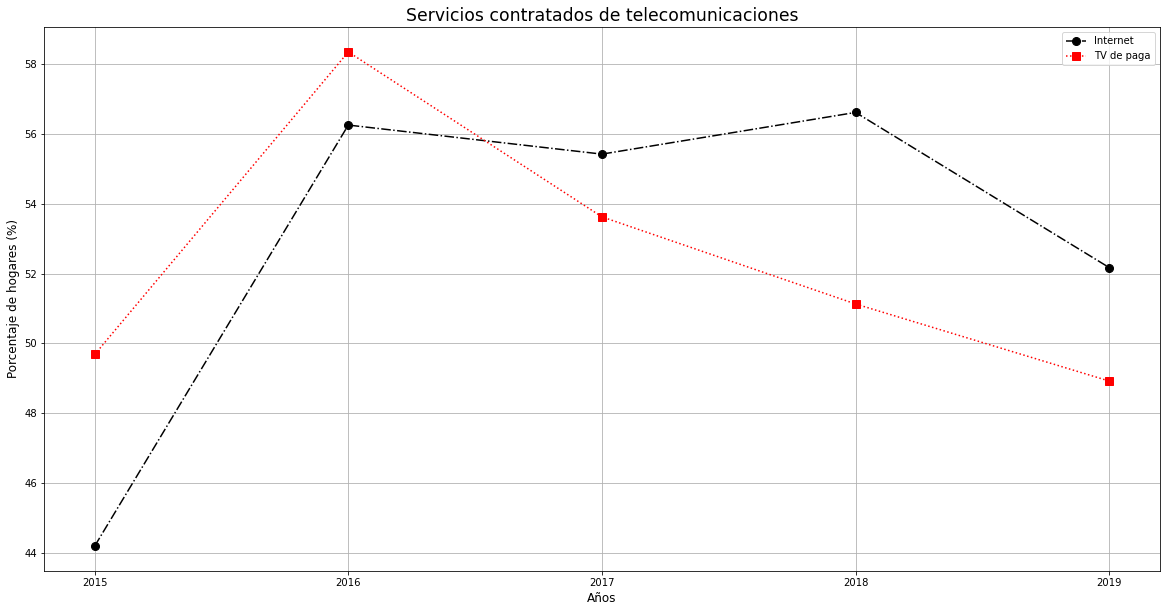

In [23]:
#Se crea una gráfica de líneas para observar la evolución en el tiempo del porcentaje de hogares que tienen contratados los servicios de internet, televisión de paga y telefonía fija, ya sea en paquete o solos
x=tabla_servicios['index'][1:6]
y1=tabla_servicios['Internet'][6:]
y2=tabla_servicios['TV_de_paga'][6:]
plt.figure(figsize=(20,10))
plt.title('Servicios contratados de telecomunicaciones',size='xx-large')
plt.xlabel('Años',size='large')
plt.ylabel('Porcentaje de hogares (%)',size='large')
plt.grid(True)
line_1, = plt.plot(x,y1,color='black',marker='o',linestyle='dashdot',markersize=8,label='Internet')
line_2, = plt.plot(x,y2,color='red',marker='s',linestyle='dotted',markersize=8,label='TV de paga')
plt.legend([line_1, line_2], ['Internet', 'TV de paga'])
plt.savefig('lineas_telecom_fijas.jpg',dpi=300, bbox_inches = "tight")

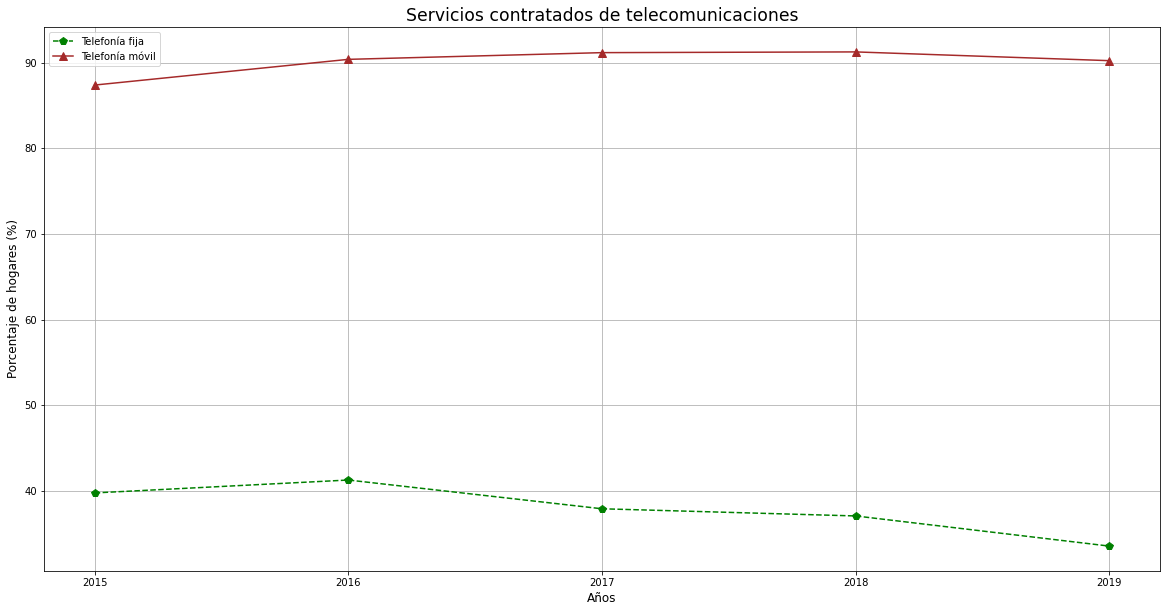

In [24]:
#Se crea una gráfica de líneas para observar la evolución en el tiempo del porcentaje de hogares que tienen contratados los servicios de internet, televisión de paga y telefonía fija, ya sea en paquete o solos
x=tabla_servicios['index'][1:6]
y1=tabla_servicios['Telefonía_fija'][6:]
y2=tabla_servicios['Móvil'][6:]
plt.figure(figsize=(20,10))
plt.title('Servicios contratados de telecomunicaciones',size='xx-large')
plt.xlabel('Años',size='large')
plt.ylabel('Porcentaje de hogares (%)',size='large')
plt.grid(True)
line_1, = plt.plot(x,y1,color='green',marker='p',linestyle='dashed',markersize=8,label='Telefonía fija')
line_2, = plt.plot(x,y2,color='brown',marker='^',linestyle='solid',markersize=8,label='Telefonía móvil')
plt.legend([line_1, line_2], ['Telefonía fija', 'Telefonía móvil'])
plt.savefig('lineas_telecom_fijas.jpg',dpi=300, bbox_inches = "tight")

# Supervised learning (classification)

In [25]:
#Se importan las bases de hohares y de usuarios y se concatenan las bases para tenerla en una sola
hogares = pd.read_csv('tic_2019_hogares.csv',encoding='latin-1')

In [26]:
usuarios = pd.read_csv('tic_2019_usuarios.csv',encoding='latin-1')

C:\Users\garci\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (29,47,60,88,97,122,156,173,186,192) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
hogaresord=hogares.sort_values(['UPM', 'VIV_SEL'], ascending=[True, True]).reset_index(drop=True)

In [28]:
hogaresord

,UPM,VIV_SEL,HOGAR,P4_1_1,P4_1_2,P4_1_3,P4_1_4,P4_1_5,P4_1_6,P4_2_1,...,P5_9_8,P5_11_1,P5_11_2,P5_11_3,FAC_HOG,UPM_DIS,EST_DIS,DOMINIO,TLOC,ESTRATO
0,100061,1,1,1,1,1,1,1,2,2,...,NaN,3.0,3.0,3.0,885,1,3,U,1,2
1,100061,2,1,1,2,2,1,1,1,2,...,NaN,1.0,1.0,1.0,885,1,3,U,1,2
2,100061,2,2,2,2,2,1,1,2,2,...,NaN,3.0,3.0,3.0,885,1,3,U,1,2
3,100061,3,1,1,1,2,1,1,2,2,...,NaN,3.0,1.0,3.0,885,1,3,U,1,2
4,100061,4,1,2,2,2,1,1,2,2,...,NaN,1.0,1.0,1.0,885,1,3,U,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21615,3260715,17,1,1,1,1,1,1,2,2,...,NaN,3.0,3.0,3.0,779,2931,279,R,4,2
21616,3260715,18,1,1,2,2,1,1,2,2,...,NaN,1.0,3.0,3.0,779,2931,279,R,4,2
21617,3260715,20,1,1,2,2,1,1,2,2,...,NaN,1.0,3.0,3.0,779,2931,279,R,4,2
21618,3260715,21,1,1,2,2,1,1,1,2,...,NaN,2.0,3.0,3.0,779,2931,279,R,4,2


In [29]:
#Se eliminan columnas que no son de interés
hogaresord.drop(['P4_1_1','P4_1_6','P4_3','P4_3A','P5_6_1','P5_6_2','P5_6_3','P5_6_4','P5_6_5','P5_7_1','P5_8_1','P5_9_1','P5_10_1','P5_7_2','P5_8_2','P5_9_2','P5_10_2','P5_7_3','P5_8_3','P5_9_3','P5_10_3','P5_7_4','P5_8_4','P5_9_4','P5_10_4','P5_7_5','P5_8_5','P5_9_5','P5_10_5','P5_7_6','P5_8_6','P5_9_6','P5_7_7','P5_8_7','P5_9_7','P5_7_8','P5_8_8','P5_9_8','P5_11_1','P5_11_2','P5_11_3','P4_6A','P4_8A','P4_7A','P5_4A','FAC_HOG','UPM_DIS','EST_DIS'],axis=1,inplace=True)

In [30]:
usuariosord=usuarios.sort_values(['UPM', 'VIV_SEL'], ascending=[True, True]).reset_index(drop=True)

In [31]:
usuariosord

,UPM,VIV_SEL,HOGAR,NUMREN,EDAD,P6_1,P6_2_1,P6_2_2,P6_2_3,P6_3,...,FAC_PER,UPM_DIS,EST_DIS,DOMINIO,TLOC,ESTRATO,PAREN,SEXO,NIVEL,GRADO
0,100061,1,1,1,73,2,NaN,NaN,NaN,2.0,...,1769,1,3,U,1,2,1,2,2,3
1,100061,2,1,1,29,2,NaN,NaN,NaN,1.0,...,1769,1,3,U,1,2,1,1,3,3
2,100061,2,2,1,64,2,NaN,NaN,NaN,2.0,...,885,1,3,U,1,2,1,2,2,6
3,100061,3,1,1,70,2,NaN,NaN,NaN,2.0,...,885,1,3,U,1,2,1,1,3,3
4,100061,4,1,1,25,2,NaN,NaN,NaN,2.0,...,1769,1,3,U,1,2,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21615,3260715,17,1,1,74,2,NaN,NaN,NaN,2.0,...,1558,2931,279,R,4,2,1,1,2,1
21616,3260715,18,1,2,20,2,NaN,NaN,NaN,1.0,...,2337,2931,279,R,4,2,3,2,3,1
21617,3260715,20,1,3,15,2,NaN,NaN,NaN,2.0,...,3896,2931,279,R,4,2,3,2,3,3
21618,3260715,21,1,3,8,1,2.0,2.0,1.0,NaN,...,2337,2931,279,R,4,2,3,1,2,3


In [32]:
#Se eliminan columnas que no son de interés
usuariosord.drop(['UPM','VIV_SEL','HOGAR','NUMREN','P6_2_1','P6_2_2','P6_2_3','P6_3','P6_3A','P6_5','P6_6_1','P6_6_2','P6_6_3','P6_6_4','P6_6_5','P6_6_6','P6_6_7','P6_6A','P6_7_1','P6_7_2','P6_7_3','P6_7_4','P6_7_5','P6_7_6','P6_7_7','P6_7_8','P6_7A','P6_8_1','P6_8_3','P6_8_4','P6_8_5','P6_8_6','P6_8_7','P6_8_8','P6_8_9','P6_8_10','P6_8A','P6_9_1','P6_9_2','P6_9_3','P6_9_6','P6_9A','P7_1','P7_2','P7_2A','P7_6','P7_7_1','P7_7_2','P7_7_3','P7_7_4','P7_7_5','P7_7_6','P7_7_7','P7_7_8','P7_7A','P7_8_1','P7_8_2','P7_8_3','P7_8_4','P7_8_5','P7_8_6','P7_8_7','P7_8A','P7_9_1','P7_9_2','P7_9_3','P7_9_4','P7_9A','P7_10_1','P7_10_4','P7_10A','P7_11_8','P7_12','P7_14_11','P7_14A','P7_15_1','P7_15_2','P7_16_1','P7_16_2','P7_16_3','P7_16_4','P7_16_5','P7_16_6','P7_16_7','P7_16_8','P7_16A','P7_17','P7_18','P7_19','P7_20_1','P7_20_2','P7_20_3','P7_20_4','P7_20_5','P7_20_6','P7_20_7','P7_20_8','P7_20A','P7_21','P7_22_1','P7_22_2','P7_22_3','P7_22_4','P7_22_5','P7_22_6','P7_22_7','P7_22_8','P7_22_9','P7_22_10','P7_22_11','P7_22_12','P7_22_13','P7_22_14','P7_22A','P7_23','P7_24_1','P7_24_2','P7_24_3','P7_24_4','P7_24A','P7_25','P7_26_1','P7_26_2','P7_26_3','P7_26_4','P7_26A','P7_27','P7_28','P7_28A','P7_29','P7_30_1','P7_30_2','P7_30_3','P7_30_4','P7_30_5','P7_30_6','P7_30A','P7_31_1','P7_31_2','P7_31_3','P7_31_4','P7_31_5','P7_31A','P7_32','P7_33_1','P7_33_2','P7_33_3','P7_33_4','P7_33_5','P7_33A','P7_34_1','P7_34_2','P7_34_3','P7_34_4','P7_34_5','P7_34A','P7_35_1','P7_35_2','P7_35_3','P7_35_4','P7_35_5','P7_35A','P7_36','P8_2','P8_2A','P8_8','P8_9','P8_11_1','P8_11_2','P8_12','P8_13_1','P8_13_2','P8_16','P8_14_7','P8_14_8','P8_14A','P8_14_4','P8_14_5','P8_14_3','P7_5A','P7_11A','FAC_PER','UPM_DIS','EST_DIS','DOMINIO','TLOC','ESTRATO'],axis=1,inplace=True)

In [33]:
det = pd.concat([hogaresord, usuariosord], axis = 1) 

In [34]:
det

,UPM,VIV_SEL,HOGAR,P4_1_2,P4_1_3,P4_1_4,P4_1_5,P4_2_1,P4_2_2,P4_2_3,...,P8_7_3,P8_10,P8_14_1,P8_14_2,P8_14_6,P8_15,PAREN,SEXO,NIVEL,GRADO
0,100061,1,1,1,1,1,1,2,2,2,...,1.0,2.0,NaN,NaN,NaN,NaN,1,2,2,3
1,100061,2,1,2,2,1,1,2,2,2,...,2.0,1.0,1.0,1.0,1.0,1.0,1,1,3,3
2,100061,2,2,2,2,1,1,2,2,2,...,2.0,NaN,NaN,NaN,NaN,NaN,1,2,2,6
3,100061,3,1,1,2,1,1,2,2,2,...,2.0,NaN,NaN,NaN,NaN,NaN,1,1,3,3
4,100061,4,1,2,2,1,1,2,2,2,...,2.0,1.0,1.0,1.0,1.0,1.0,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21615,3260715,17,1,1,1,1,1,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2,1
21616,3260715,18,1,2,2,1,1,2,2,1,...,1.0,1.0,NaN,NaN,NaN,1.0,3,2,3,1
21617,3260715,20,1,2,2,1,1,2,2,2,...,2.0,1.0,NaN,NaN,NaN,1.0,3,2,3,3
21618,3260715,21,1,2,2,1,1,2,2,2,...,2.0,1.0,2.0,2.0,2.0,1.0,3,1,2,3


In [35]:
#Se creará un variable de clasificación para determinar si un encuestado tiene TV de paga(1) o no(0).
det['TV_PAGA']=np.where(det['P5_1']==1, 1, 0)

In [36]:
#Se creará un variable de clasificación para determinar si un encuestado tiene Internet en el hogar(1) o no(0).
det['INTERNET']=np.where(det['P4_4']==1, 1, 0)

In [37]:
det.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21620 entries, 0 to 21619
Data columns (total 89 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UPM       21620 non-null  int64  
 1   VIV_SEL   21620 non-null  int64  
 2   HOGAR     21620 non-null  int64  
 3   P4_1_2    21620 non-null  int64  
 4   P4_1_3    21620 non-null  int64  
 5   P4_1_4    21620 non-null  int64  
 6   P4_1_5    21620 non-null  int64  
 7   P4_2_1    21620 non-null  int64  
 8   P4_2_2    21620 non-null  int64  
 9   P4_2_3    21620 non-null  int64  
 10  P4_4      21620 non-null  int64  
 11  P4_5      11279 non-null  float64
 12  P4_6_1    9654 non-null   float64
 13  P4_6_2    9654 non-null   float64
 14  P4_6_3    9654 non-null   float64
 15  P4_6_4    9654 non-null   float64
 16  P4_6_5    9654 non-null   float64
 17  P4_6_6    9654 non-null   float64
 18  P4_7_1    5275 non-null   float64
 19  P4_7_2    5275 non-null   float64
 20  P4_7_3    5275 non-null   fl

In [38]:
#se cambiará la variable "Dominio" a numérica, la cual identifica la población del encuestado en urbana y rural. Quedará de la siguiente manera: urbana=1, rural=0.
det['DOMINIO'] = det['DOMINIO'].replace(['U'],1)
det['DOMINIO'] = det['DOMINIO'].replace(['R'],0)
det['DOMINIO'].value_counts()

1    14265
0     7355
Name: DOMINIO, dtype: int64

In [39]:
#se cambiará la variable "SEXO" la cual identifica el sexo del encuestado. Quedará de la siguiente manera: hombre=1, mujer=0.
det['SEXO'] = det['SEXO'].replace([2],0)
det['SEXO'].value_counts()

0    11295
1    10325
Name: SEXO, dtype: int64

In [40]:
det

,UPM,VIV_SEL,HOGAR,P4_1_2,P4_1_3,P4_1_4,P4_1_5,P4_2_1,P4_2_2,P4_2_3,...,P8_14_1,P8_14_2,P8_14_6,P8_15,PAREN,SEXO,NIVEL,GRADO,TV_PAGA,INTERNET
0,100061,1,1,1,1,1,1,2,2,2,...,NaN,NaN,NaN,NaN,1,0,2,3,0,0
1,100061,2,1,2,2,1,1,2,2,2,...,1.0,1.0,1.0,1.0,1,1,3,3,1,1
2,100061,2,2,2,2,1,1,2,2,2,...,NaN,NaN,NaN,NaN,1,0,2,6,0,0
3,100061,3,1,1,2,1,1,2,2,2,...,NaN,NaN,NaN,NaN,1,1,3,3,1,0
4,100061,4,1,2,2,1,1,2,2,2,...,1.0,1.0,1.0,1.0,1,1,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21615,3260715,17,1,1,1,1,1,2,2,2,...,NaN,NaN,NaN,NaN,1,1,2,1,0,0
21616,3260715,18,1,2,2,1,1,2,2,1,...,NaN,NaN,NaN,1.0,3,0,3,1,0,1
21617,3260715,20,1,2,2,1,1,2,2,2,...,NaN,NaN,NaN,1.0,3,0,3,3,0,1
21618,3260715,21,1,2,2,1,1,2,2,2,...,2.0,2.0,2.0,1.0,3,1,2,3,0,1


In [41]:
#Primero se hará el modelo logístico para determinar factores de TV de paga
det1=det

In [42]:
det1=det.rename(columns={'P4_1_2': 'televisor_analogico','P4_1_3':'televisor_decodificador','P4_1_4':'televisor_digital','P4_2_1':'compu_escritorio','P4_2_2':'compu_lap','P4_2_3':'tablet','P4_4':'interneth','P6_4':'uso_computadora','P6_8_2':'compu_contenidos_internet','P6_9_4':'compu_entretenimiento','P6_9_5':'computadora_internet','P7_3':'frecuencia_internet','P7_4':'horas_internet','P7_5_1':'internet_escritorio','P7_5_2':'internet_lap','P7_5_3':'internet_tablet','P7_5_4':'internet_smartphone','P7_5_5':'internet_smarttv','P7_11_2':'internet_ottpago','P7_11_3':'internet_ottgratis','P7_11_4':'internet_ottmusica','P7_11_6':'internet_radio','P7_11_7':'internet_tv','P7_14_7':'internet_youtube','P8_14_2':'celular_contenidos','P8_15':'frecuencia_internet_smartphone'})

In [43]:
det1.drop(['UPM','VIV_SEL','HOGAR','P4_1_5','P4_5','P4_6_1','P4_6_2','P4_6_3','P4_6_4','P4_6_5','P4_6_6','P4_7_1','P4_7_2','P4_7_3','P4_7_4','P4_8','P5_1','P5_2_1','P5_2_2','P5_3_1','P5_3_2','P5_4','P5_5','P6_1','P7_5_6','P7_5_7','P7_10_2','P7_10_3','P7_11_1','P7_11_5','P7_13','P7_14_1','P7_14_2','P7_14_3','P7_14_4','P7_14_5','P7_14_6','P7_14_8','P7_14_9','P7_14_10','P8_1','P8_3','P8_4_1','P8_4_2','P8_5_1','P8_5_2','P8_6','P8_7_1','P8_7_2','P8_7_3','P8_10','P8_14_1','P8_14_6','GRADO'],axis=1,inplace=True)

In [44]:
det1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21620 entries, 0 to 21619
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   televisor_analogico             21620 non-null  int64  
 1   televisor_decodificador         21620 non-null  int64  
 2   televisor_digital               21620 non-null  int64  
 3   compu_escritorio                21620 non-null  int64  
 4   compu_lap                       21620 non-null  int64  
 5   tablet                          21620 non-null  int64  
 6   interneth                       21620 non-null  int64  
 7   DOMINIO                         21620 non-null  int64  
 8   TLOC                            21620 non-null  int64  
 9   ESTRATO                         21620 non-null  int64  
 10  EDAD                            21620 non-null  int64  
 11  uso_computadora                 8536 non-null   float64
 12  compu_contenidos_internet       

In [45]:
det1.dropna(inplace=True)

In [46]:
det1.reset_index(drop=True)

,televisor_analogico,televisor_decodificador,televisor_digital,compu_escritorio,compu_lap,tablet,interneth,DOMINIO,TLOC,ESTRATO,...,internet_radio,internet_tv,internet_youtube,celular_contenidos,frecuencia_internet_smartphone,PAREN,SEXO,NIVEL,TV_PAGA,INTERNET
0,2,2,1,1,2,2,1,1,1,2,...,2.0,2.0,2.0,1.0,1.0,1,1,8,1,1
1,2,2,1,2,1,2,1,1,1,2,...,2.0,2.0,2.0,1.0,1.0,2,0,8,1,1
2,2,2,1,2,2,1,1,1,1,2,...,2.0,2.0,1.0,1.0,1.0,3,0,6,0,1
3,2,2,1,2,1,1,1,1,1,2,...,1.0,2.0,2.0,1.0,1.0,2,0,7,1,1
4,2,2,1,1,2,2,1,1,1,3,...,1.0,2.0,2.0,1.0,1.0,3,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,2,1,1,2,1,2,1,0,4,2,...,2.0,2.0,2.0,1.0,1.0,3,0,6,0,1
5814,1,2,1,1,1,2,1,0,4,2,...,2.0,1.0,2.0,1.0,1.0,1,0,8,1,1
5815,1,2,1,2,2,2,1,0,4,2,...,2.0,2.0,1.0,2.0,1.0,3,1,6,0,1
5816,1,2,1,2,2,2,2,0,4,1,...,2.0,2.0,2.0,1.0,1.0,3,1,3,0,0


In [47]:
det1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 5 to 21611
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   televisor_analogico             5818 non-null   int64  
 1   televisor_decodificador         5818 non-null   int64  
 2   televisor_digital               5818 non-null   int64  
 3   compu_escritorio                5818 non-null   int64  
 4   compu_lap                       5818 non-null   int64  
 5   tablet                          5818 non-null   int64  
 6   interneth                       5818 non-null   int64  
 7   DOMINIO                         5818 non-null   int64  
 8   TLOC                            5818 non-null   int64  
 9   ESTRATO                         5818 non-null   int64  
 10  EDAD                            5818 non-null   int64  
 11  uso_computadora                 5818 non-null   float64
 12  compu_contenidos_internet       5

In [48]:
#se cambiarán la variables que tienen valores 2 y 1 para que tengan valores 1 y 0. 
det1['televisor_analogico'] = det1['televisor_analogico'].replace([2],0)
det1['televisor_decodificador'] = det1['televisor_decodificador'].replace([2],0)
det1['televisor_digital'] = det1['televisor_digital'].replace([2],0)
det1['compu_escritorio'] = det1['compu_escritorio'].replace([2],0)
det1['compu_lap'] = det1['compu_lap'].replace([2],0)
det1['tablet'] = det1['tablet'].replace([2],0)
det1['interneth'] = det1['interneth'].replace([2],0)
det1['compu_contenidos_internet'] = det1['compu_contenidos_internet'].replace([2],0)
det1['compu_entretenimiento'] = det1['compu_entretenimiento'].replace([2],0)
det1['computadora_internet'] = det1['computadora_internet'].replace([2],0)
det1['internet_escritorio'] = det1['internet_escritorio'].replace([2],0)
det1['internet_lap'] = det1['internet_lap'].replace([2],0)
det1['internet_tablet'] = det1['internet_tablet'].replace([2],0)
det1['internet_smartphone'] = det1['internet_smartphone'].replace([2],0)
det1['internet_smarttv'] = det1['internet_smarttv'].replace([2],0)
det1['internet_ottpago'] = det1['internet_ottpago'].replace([2],0)
det1['internet_ottgratis'] = det1['internet_ottgratis'].replace([2],0)
det1['internet_ottmusica'] = det1['internet_ottmusica'].replace([2],0)
det1['internet_radio'] = det1['internet_radio'].replace([2],0)
det1['internet_tv'] = det1['internet_tv'].replace([2],0)
det1['internet_youtube'] = det1['internet_youtube'].replace([2],0)
det1['celular_contenidos'] = det1['celular_contenidos'].replace([2],0)

In [49]:
det1['internet_smarttv'].value_counts()

0.0    3592
1.0    2226
Name: internet_smarttv, dtype: int64

In [50]:
y1=det1['TV_PAGA']

In [51]:
X1=det1

In [52]:
X1.drop(['TV_PAGA','INTERNET'],axis=1,inplace=True)

In [53]:
X1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 5 to 21611
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   televisor_analogico             5818 non-null   int64  
 1   televisor_decodificador         5818 non-null   int64  
 2   televisor_digital               5818 non-null   int64  
 3   compu_escritorio                5818 non-null   int64  
 4   compu_lap                       5818 non-null   int64  
 5   tablet                          5818 non-null   int64  
 6   interneth                       5818 non-null   int64  
 7   DOMINIO                         5818 non-null   int64  
 8   TLOC                            5818 non-null   int64  
 9   ESTRATO                         5818 non-null   int64  
 10  EDAD                            5818 non-null   int64  
 11  uso_computadora                 5818 non-null   float64
 12  compu_contenidos_internet       5

In [54]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,train_size=0.8)

In [55]:
logreg=LogisticRegression(max_iter=1000)

In [56]:
logreg.fit(X1_train,y1_train)

LogisticRegression(max_iter=1000)

In [57]:
y1_pred=logreg.predict(X1_test)

In [58]:
confusion_matrix(y1_test,y1_pred)

array([[194, 308],
       [123, 539]], dtype=int64)

In [59]:
accuracy_score(y1_test,y1_pred)

0.6297250859106529

In [60]:
logit_model=sm.Logit(y1,X1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.631797
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                TV_PAGA   No. Observations:                 5818
Model:                          Logit   Df Residuals:                     5785
Method:                           MLE   Df Model:                           32
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                 0.07265
Time:                        13:24:03   Log-Likelihood:                -3675.8
converged:                       True   LL-Null:                       -3963.8
Covariance Type:            nonrobust   LLR p-value:                5.379e-101
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
televisor_analogico                0.8585      0.075     11.522     

In [61]:
#Se quitarán las variables que no quedaron significativas
X1.drop(['ESTRATO','uso_computadora','compu_entretenimiento','computadora_internet','frecuencia_internet','horas_internet','internet_escritorio','internet_lap','internet_ottpago','internet_ottmusica','internet_radio','internet_youtube','celular_contenidos','frecuencia_internet_smartphone','SEXO','NIVEL'],axis=1,inplace=True)

In [62]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,train_size=0.8)

In [63]:
logreg=LogisticRegression(max_iter=1000)

In [64]:
logreg.fit(X1_train,y1_train)

LogisticRegression(max_iter=1000)

In [65]:
y1_pred=logreg.predict(X1_test)

In [66]:
confusion_matrix(y1_test,y1_pred)

array([[199, 283],
       [128, 554]], dtype=int64)

In [67]:
accuracy_score(y1_test,y1_pred)

0.6469072164948454

In [68]:
logreg.score(X1_train,y1_train)

0.6411688869789428

In [69]:
logreg.score(X1_test,y1_test)

0.6469072164948454

In [70]:
logit_model=sm.Logit(y1,X1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.632972
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                TV_PAGA   No. Observations:                 5818
Model:                          Logit   Df Residuals:                     5801
Method:                           MLE   Df Model:                           16
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                 0.07093
Time:                        13:24:11   Log-Likelihood:                -3682.6
converged:                       True   LL-Null:                       -3963.8
Covariance Type:            nonrobust   LLR p-value:                2.253e-109
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
televisor_analogico           0.8587      0.074     11.574      0.000       0.

In [71]:
y1

5        1
6        1
9        0
10       1
15       1
        ..
21480    0
21486    1
21499    0
21575    0
21611    0
Name: TV_PAGA, Length: 5818, dtype: int32

In [72]:
det1['internet_tv'].value_counts()

0.0    4483
1.0    1335
Name: internet_tv, dtype: int64

In [73]:
params={'random_state':0,'max_depth':3}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [74]:
y_pred_confussion = classifier.predict(X1_test)
confusion_matrix(y1_test,y_pred_confussion)

array([[162, 320],
       [ 87, 595]], dtype=int64)

In [75]:
class_names = ['Class-0','Class-1']
print('\n')
print('\n'+"*"*40)
print('\n Classifier performance on Training dataset\n')
print(classification_report(y1_train,classifier.predict(X1_train),target_names=class_names))
print('\n'+"*"*40)
print('\n Classifier performance on Test dataset\n')
print(classification_report(y1_test,y_pred_confussion,target_names=class_names))

#Precisision: Verdaderos positivos, porcentaje de datos que fueron correctamente predichos
# Recall: Cuantos items de los que seleccionaste fueron importantes y que realmente pertenecen a la clase
#f1 score: pondera ambos, Se usa cuando nos interesa tanto precission como recall
#f1 es 0, significa que tu entrenamiento fue un desastre
#fe es 1, fue muy acertado

#clase 0 aproibados
#clase 1 rechazados




****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

     Class-0       0.69      0.33      0.45      1980
     Class-1       0.64      0.89      0.75      2674

    accuracy                           0.65      4654
   macro avg       0.67      0.61      0.60      4654
weighted avg       0.66      0.65      0.62      4654


****************************************

 Classifier performance on Test dataset

              precision    recall  f1-score   support

     Class-0       0.65      0.34      0.44       482
     Class-1       0.65      0.87      0.75       682

    accuracy                           0.65      1164
   macro avg       0.65      0.60      0.59      1164
weighted avg       0.65      0.65      0.62      1164



In [76]:
accuracy_score(y1_test,y_pred_confussion)

0.6503436426116839

0.656750039546854

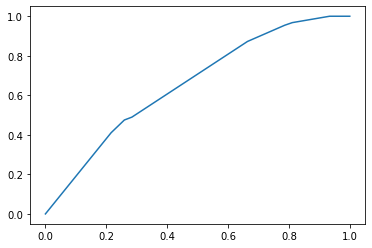

In [77]:
y_pred_proba = classifier.predict_proba(X1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,y_pred_proba)
auc = metrics.roc_auc_score(y1_test,y_pred_proba)
plt.plot(fpr,tpr)
auc

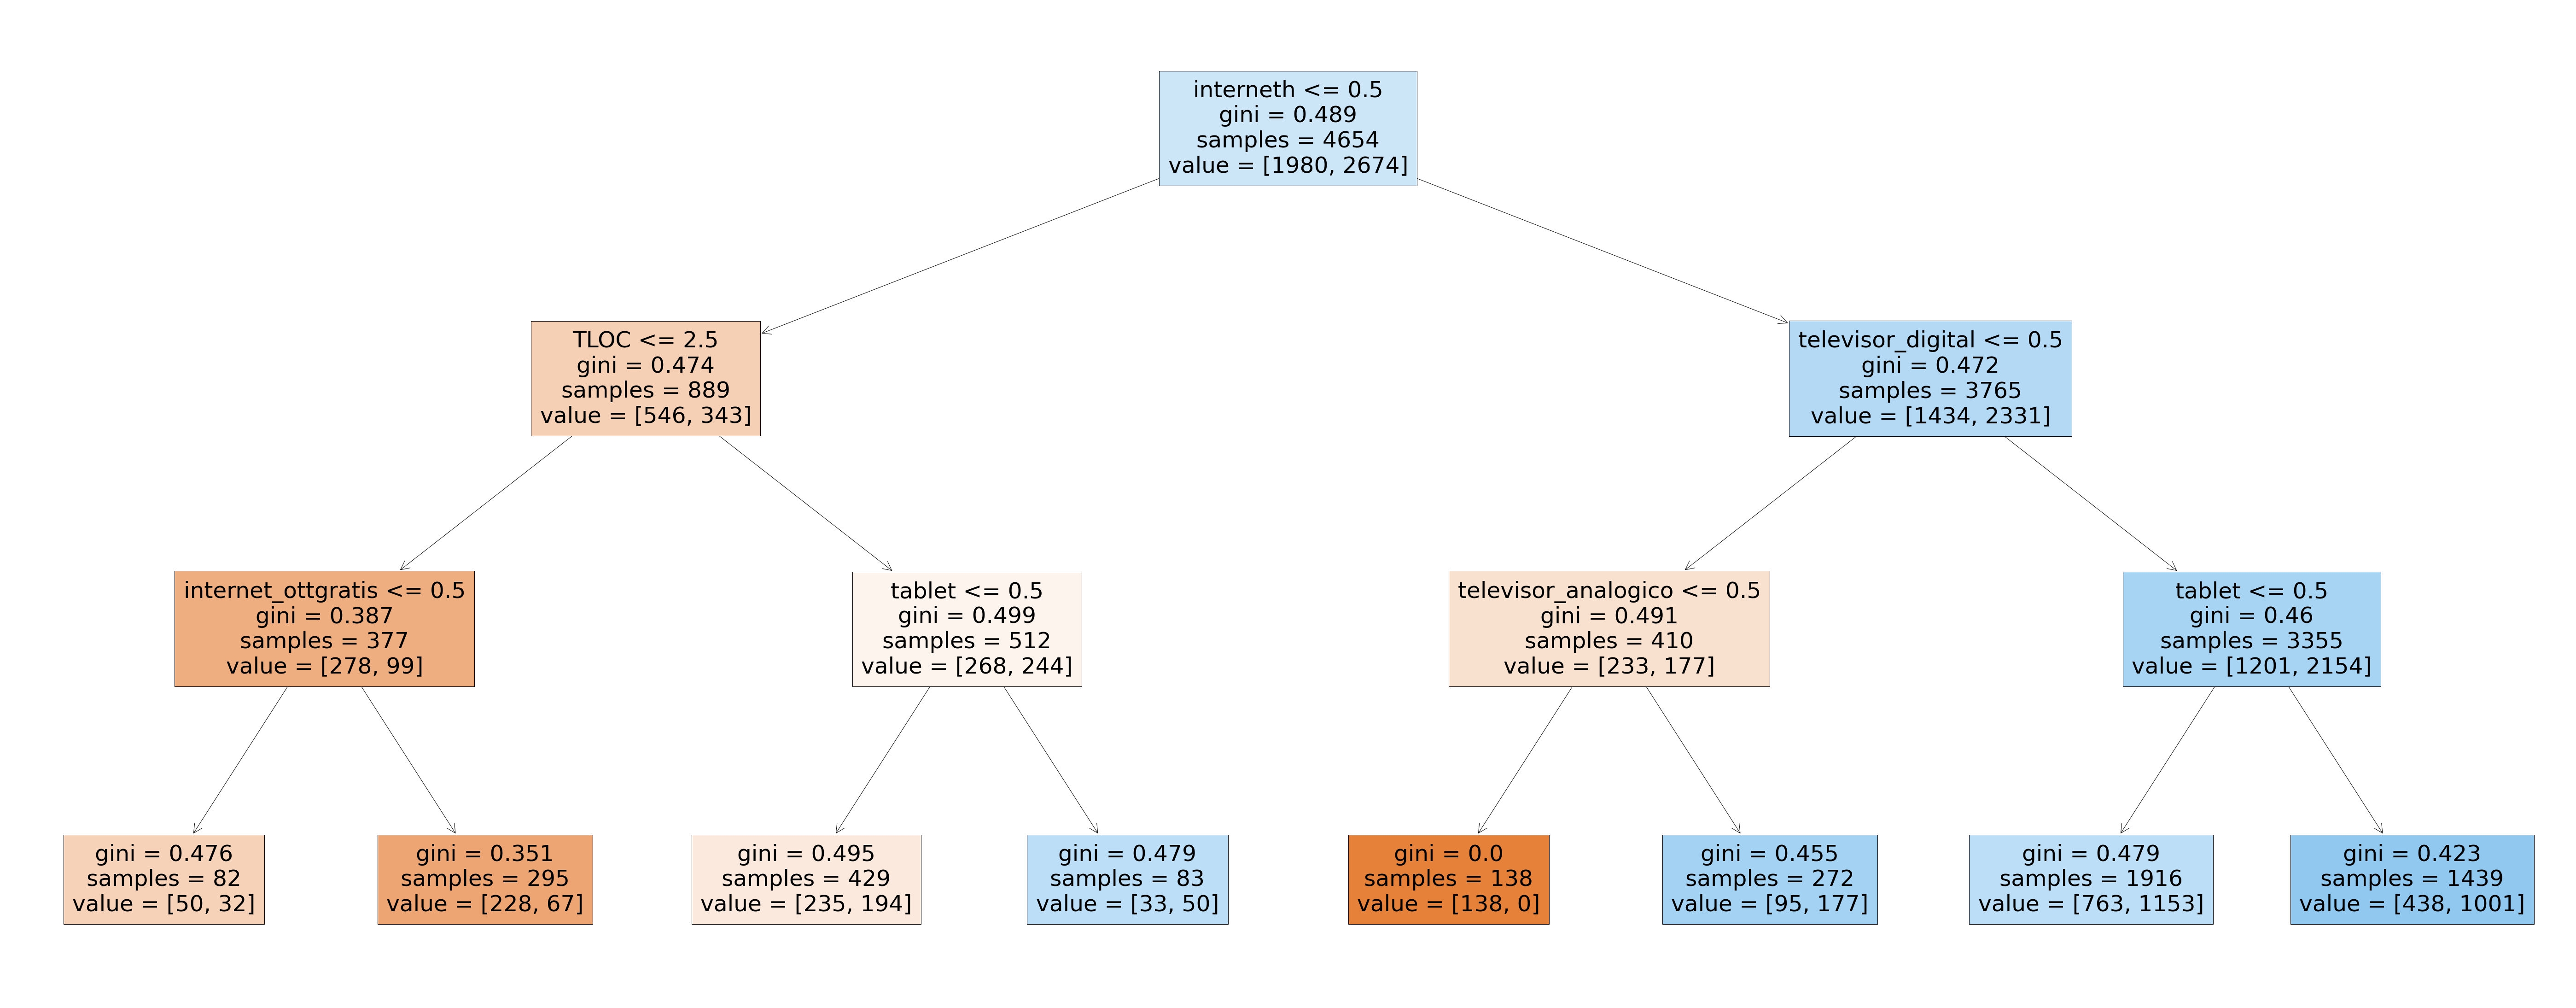

In [78]:
plt.figure(figsize=(100,40), facecolor='w')
tree.plot_tree(classifier,
               feature_names=X1.columns,
               filled = True);

In [79]:
classifier= RandomForestClassifier(n_estimators=100,max_depth=4, random_state=0)
classifier.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [80]:
y_test_pred = classifier.predict(X1_test)

In [81]:
accuracy_score(y1_test,y_test_pred)

0.6572164948453608

In [82]:
classifier.feature_importances_

array([0.13258915, 0.0211403 , 0.15726313, 0.03670158, 0.08431648,
       0.0945085 , 0.23233603, 0.01840575, 0.03735407, 0.06263671,
       0.00675892, 0.02010436, 0.        , 0.04604368, 0.01375527,
       0.00502913, 0.03105695])

In [83]:
class_names = ['Tienen TV_PAGA','No tienen TV_PAGA']
print('\n')
print('\n'+"*"*40)
print('\n Classifier performance on Training dataset\n')
print(classification_report(y1_train,classifier.predict(X1_train),target_names=class_names))
print('\n'+"*"*40)
print('\n Classifier performance on Test dataset\n')
print(classification_report(y1_test,y_test_pred,target_names=class_names))




****************************************

 Classifier performance on Training dataset

                   precision    recall  f1-score   support

   Tienen TV_PAGA       0.70      0.32      0.44      1980
No tienen TV_PAGA       0.64      0.90      0.75      2674

         accuracy                           0.65      4654
        macro avg       0.67      0.61      0.60      4654
     weighted avg       0.67      0.65      0.62      4654


****************************************

 Classifier performance on Test dataset

                   precision    recall  f1-score   support

   Tienen TV_PAGA       0.67      0.34      0.45       482
No tienen TV_PAGA       0.65      0.88      0.75       682

         accuracy                           0.66      1164
        macro avg       0.66      0.61      0.60      1164
     weighted avg       0.66      0.66      0.63      1164



In [84]:
#Se hará el modelo logístico para determinar factores de Internet
det2=det

In [85]:
det2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21620 entries, 0 to 21619
Data columns (total 89 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UPM       21620 non-null  int64  
 1   VIV_SEL   21620 non-null  int64  
 2   HOGAR     21620 non-null  int64  
 3   P4_1_2    21620 non-null  int64  
 4   P4_1_3    21620 non-null  int64  
 5   P4_1_4    21620 non-null  int64  
 6   P4_1_5    21620 non-null  int64  
 7   P4_2_1    21620 non-null  int64  
 8   P4_2_2    21620 non-null  int64  
 9   P4_2_3    21620 non-null  int64  
 10  P4_4      21620 non-null  int64  
 11  P4_5      11279 non-null  float64
 12  P4_6_1    9654 non-null   float64
 13  P4_6_2    9654 non-null   float64
 14  P4_6_3    9654 non-null   float64
 15  P4_6_4    9654 non-null   float64
 16  P4_6_5    9654 non-null   float64
 17  P4_6_6    9654 non-null   float64
 18  P4_7_1    5275 non-null   float64
 19  P4_7_2    5275 non-null   float64
 20  P4_7_3    5275 non-null   fl

In [86]:
det2=det.rename(columns={'P4_1_2': 'televisor_analogico','P4_1_3':'televisor_decodificador','P4_1_4':'televisor_digital','P4_2_1':'compu_escritorio','P4_2_2':'compu_lap','P4_2_3':'tablet','P5_1':'tv_pagah','P6_4':'uso_computadora','P6_8_2':'compu_contenidos_internet','P6_9_4':'compu_entretenimiento','P6_9_5':'computadora_internet','P7_3':'frecuencia_internet','P7_4':'horas_internet','P7_5_1':'internet_escritorio','P7_5_2':'internet_lap','P7_5_3':'internet_tablet','P7_5_4':'internet_smartphone','P7_5_5':'internet_smarttv','P7_11_2':'internet_ottpago','P7_11_3':'internet_ottgratis','P7_11_4':'internet_ottmusica','P7_11_6':'internet_radio','P7_11_7':'internet_tv','P7_14_7':'internet_youtube','P8_14_2':'celular_contenidos','P8_15':'frecuencia_internet_smartphone'})

In [87]:
det2.drop(['UPM','VIV_SEL','HOGAR','P4_1_5','P4_4','P4_5','P4_6_1','P4_6_2','P4_6_3','P4_6_4','P4_6_5','P4_6_6','P4_7_1','P4_7_2','P4_7_3','P4_7_4','P4_8','P5_2_1','P5_2_2','P5_3_1','P5_3_2','P5_4','P5_5','P6_1','P7_5_6','P7_5_7','P7_10_2','P7_10_3','P7_11_1','P7_11_5','P7_13','P7_14_1','P7_14_2','P7_14_3','P7_14_4','P7_14_5','P7_14_6','P7_14_8','P7_14_9','P7_14_10','P8_1','P8_3','P8_4_1','P8_4_2','P8_5_1','P8_5_2','P8_6','P8_7_1','P8_7_2','P8_7_3','P8_10','P8_14_1','P8_14_6','GRADO'],axis=1,inplace=True)

In [88]:
det2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21620 entries, 0 to 21619
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   televisor_analogico             21620 non-null  int64  
 1   televisor_decodificador         21620 non-null  int64  
 2   televisor_digital               21620 non-null  int64  
 3   compu_escritorio                21620 non-null  int64  
 4   compu_lap                       21620 non-null  int64  
 5   tablet                          21620 non-null  int64  
 6   tv_pagah                        21620 non-null  int64  
 7   DOMINIO                         21620 non-null  int64  
 8   TLOC                            21620 non-null  int64  
 9   ESTRATO                         21620 non-null  int64  
 10  EDAD                            21620 non-null  int64  
 11  uso_computadora                 8536 non-null   float64
 12  compu_contenidos_internet       

In [89]:
det2.dropna(inplace=True)

In [90]:
det2.reset_index(drop=True)

,televisor_analogico,televisor_decodificador,televisor_digital,compu_escritorio,compu_lap,tablet,tv_pagah,DOMINIO,TLOC,ESTRATO,...,internet_radio,internet_tv,internet_youtube,celular_contenidos,frecuencia_internet_smartphone,PAREN,SEXO,NIVEL,TV_PAGA,INTERNET
0,2,2,1,1,2,2,1,1,1,2,...,2.0,2.0,2.0,1.0,1.0,1,1,8,1,1
1,2,2,1,2,1,2,1,1,1,2,...,2.0,2.0,2.0,1.0,1.0,2,0,8,1,1
2,2,2,1,2,2,1,2,1,1,2,...,2.0,2.0,1.0,1.0,1.0,3,0,6,0,1
3,2,2,1,2,1,1,1,1,1,2,...,1.0,2.0,2.0,1.0,1.0,2,0,7,1,1
4,2,2,1,1,2,2,1,1,1,3,...,1.0,2.0,2.0,1.0,1.0,3,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,2,1,1,2,1,2,2,0,4,2,...,2.0,2.0,2.0,1.0,1.0,3,0,6,0,1
5814,1,2,1,1,1,2,1,0,4,2,...,2.0,1.0,2.0,1.0,1.0,1,0,8,1,1
5815,1,2,1,2,2,2,2,0,4,2,...,2.0,2.0,1.0,2.0,1.0,3,1,6,0,1
5816,1,2,1,2,2,2,2,0,4,1,...,2.0,2.0,2.0,1.0,1.0,3,1,3,0,0


In [91]:
det2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 5 to 21611
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   televisor_analogico             5818 non-null   int64  
 1   televisor_decodificador         5818 non-null   int64  
 2   televisor_digital               5818 non-null   int64  
 3   compu_escritorio                5818 non-null   int64  
 4   compu_lap                       5818 non-null   int64  
 5   tablet                          5818 non-null   int64  
 6   tv_pagah                        5818 non-null   int64  
 7   DOMINIO                         5818 non-null   int64  
 8   TLOC                            5818 non-null   int64  
 9   ESTRATO                         5818 non-null   int64  
 10  EDAD                            5818 non-null   int64  
 11  uso_computadora                 5818 non-null   float64
 12  compu_contenidos_internet       5

In [92]:
#se cambiarán la variables que tienen valores 2 y 1 para que tengan valores 1 y 0. 
det2['televisor_analogico'] = det2['televisor_analogico'].replace([2],0)
det2['televisor_decodificador'] = det2['televisor_decodificador'].replace([2],0)
det2['televisor_digital'] = det2['televisor_digital'].replace([2],0)
det2['compu_escritorio'] = det2['compu_escritorio'].replace([2],0)
det2['compu_lap'] = det2['compu_lap'].replace([2],0)
det2['tablet'] = det2['tablet'].replace([2],0)
det2['tv_pagah'] = det2['tv_pagah'].replace([2],0)
det2['compu_contenidos_internet'] = det2['compu_contenidos_internet'].replace([2],0)
det2['compu_entretenimiento'] = det2['compu_entretenimiento'].replace([2],0)
det2['computadora_internet'] = det2['computadora_internet'].replace([2],0)
det2['internet_escritorio'] = det2['internet_escritorio'].replace([2],0)
det2['internet_lap'] = det2['internet_lap'].replace([2],0)
det2['internet_lap'] = det2['internet_lap'].replace([2],0)
det2['internet_tablet'] = det2['internet_tablet'].replace([2],0)
det2['internet_smartphone'] = det2['internet_smartphone'].replace([2],0)
det2['internet_smarttv'] = det2['internet_smarttv'].replace([2],0)
det2['internet_ottpago'] = det2['internet_ottpago'].replace([2],0)
det2['internet_ottgratis'] = det2['internet_ottgratis'].replace([2],0)
det2['internet_ottmusica'] = det2['internet_ottmusica'].replace([2],0)
det2['internet_radio'] = det2['internet_radio'].replace([2],0)
det2['internet_tv'] = det2['internet_tv'].replace([2],0)
det2['internet_youtube'] = det2['internet_youtube'].replace([2],0)
det2['celular_contenidos'] = det2['celular_contenidos'].replace([2],0)

In [93]:
y2=det2['INTERNET']

In [94]:
X2=det2

In [95]:
X2.drop(['TV_PAGA','INTERNET'],axis=1,inplace=True)

In [96]:
X2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 5 to 21611
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   televisor_analogico             5818 non-null   int64  
 1   televisor_decodificador         5818 non-null   int64  
 2   televisor_digital               5818 non-null   int64  
 3   compu_escritorio                5818 non-null   int64  
 4   compu_lap                       5818 non-null   int64  
 5   tablet                          5818 non-null   int64  
 6   tv_pagah                        5818 non-null   int64  
 7   DOMINIO                         5818 non-null   int64  
 8   TLOC                            5818 non-null   int64  
 9   ESTRATO                         5818 non-null   int64  
 10  EDAD                            5818 non-null   int64  
 11  uso_computadora                 5818 non-null   float64
 12  compu_contenidos_internet       5

In [97]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,train_size=0.8)

In [98]:
logreg2=LogisticRegression(max_iter=1000)

In [99]:
logreg2.fit(X2_train,y2_train)

LogisticRegression(max_iter=1000)

In [100]:
y2_pred=logreg2.predict(X2_test)

In [101]:
confusion_matrix(y2_test,y2_pred)

array([[121, 110],
       [ 53, 880]], dtype=int64)

In [102]:
accuracy_score(y2_test,y2_pred)

0.8599656357388317

In [103]:
logit_model2=sm.Logit(y2,X2)
result2=logit_model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.321872
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               INTERNET   No. Observations:                 5818
Model:                          Logit   Df Residuals:                     5785
Method:                           MLE   Df Model:                           32
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                  0.3455
Time:                        13:24:38   Log-Likelihood:                -1872.7
converged:                       True   LL-Null:                       -2861.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
televisor_analogico               -0.2467      0.104     -2.380     

In [104]:
#Se quitarán las variables que no quedaron significativas
X2.drop(['televisor_decodificador','televisor_digital','DOMINIO','uso_computadora','compu_entretenimiento','compu_contenidos_internet','internet_lap','internet_ottmusica','internet_radio','internet_tv','internet_youtube','celular_contenidos','frecuencia_internet_smartphone','PAREN','SEXO','NIVEL'],axis=1,inplace=True)

In [105]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,train_size=0.8)

In [106]:
logreg2=LogisticRegression(max_iter=1000)

In [107]:
logreg2.fit(X2_train,y2_train)

LogisticRegression(max_iter=1000)

In [108]:
y2_pred=logreg2.predict(X2_test)

In [109]:
confusion_matrix(y2_test,y2_pred)

array([[121, 120],
       [ 42, 881]], dtype=int64)

In [110]:
accuracy_score(y2_test,y2_pred)

0.8608247422680413

In [111]:
logit_model2=sm.Logit(y2,X2)
result2=logit_model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.323272
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               INTERNET   No. Observations:                 5818
Model:                          Logit   Df Residuals:                     5801
Method:                           MLE   Df Model:                           16
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                  0.3427
Time:                        13:24:50   Log-Likelihood:                -1880.8
converged:                       True   LL-Null:                       -2861.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
televisor_analogico     -0.2427      0.087     -2.782      0.005      -0.414      -0.072

In [112]:
params={'random_state':0,'max_depth':4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [113]:
y_pred_confussion = classifier.predict(X2_test)
confusion_matrix(y2_test,y_pred_confussion)

array([[ 64, 177],
       [ 33, 890]], dtype=int64)

In [114]:
class_names = ['Class-0','Class-1']
print('\n')
print('\n'+"*"*40)
print('\n Classifier performance on Training dataset\n')
print(classification_report(y2_train,classifier.predict(X2_train),target_names=class_names))
print('\n'+"*"*40)
print('\n Classifier performance on Test dataset\n')
print(classification_report(y2_test,y_pred_confussion,target_names=class_names))

#Precisision: Verdaderos positivos, porcentaje de datos que fueron correctamente predichos
# Recall: Cuantos items de los que seleccionaste fueron importantes y que realmente pertenecen a la clase
#f1 score: pondera ambos, Se usa cuando nos interesa tanto precission como recall
#f1 es 0, significa que tu entrenamiento fue un desastre
#fe es 1, fue muy acertado

#clase 0 aproibados
#clase 1 rechazados




****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

     Class-0       0.67      0.24      0.35       887
     Class-1       0.84      0.97      0.90      3767

    accuracy                           0.83      4654
   macro avg       0.76      0.61      0.63      4654
weighted avg       0.81      0.83      0.80      4654


****************************************

 Classifier performance on Test dataset

              precision    recall  f1-score   support

     Class-0       0.66      0.27      0.38       241
     Class-1       0.83      0.96      0.89       923

    accuracy                           0.82      1164
   macro avg       0.75      0.61      0.64      1164
weighted avg       0.80      0.82      0.79      1164



In [115]:
accuracy_score(y2_test,y_pred_confussion)

0.8195876288659794

0.853301744716624

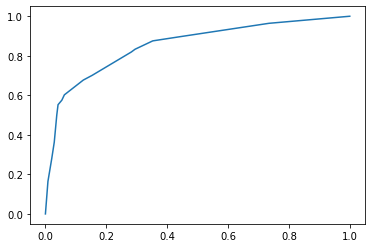

In [116]:
y_pred_proba = classifier.predict_proba(X2_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y2_test,y_pred_proba)
auc = metrics.roc_auc_score(y2_test,y_pred_proba)
plt.plot(fpr,tpr)
auc

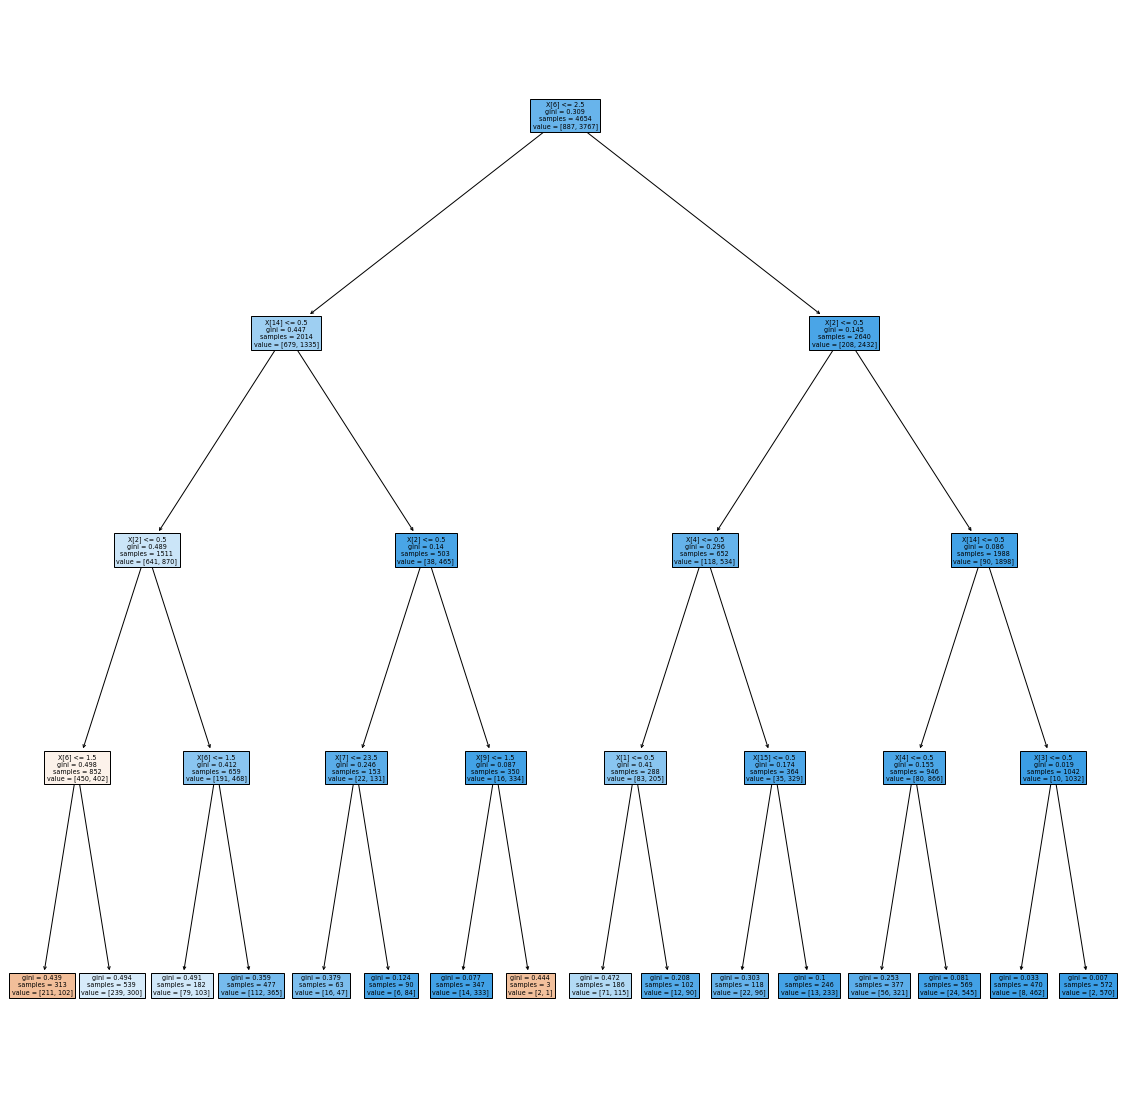

In [117]:
plt.figure(figsize=(20,20), facecolor='w')
tree.plot_tree(classifier,
               filled = True);

In [118]:
classifier= RandomForestClassifier(n_estimators=100,max_depth=4, random_state=0)
classifier.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [119]:
y_test_pred = classifier.predict(X2_test)

In [120]:
accuracy_score(y2_test,y_test_pred)

0.8410652920962199

In [121]:
classifier.feature_importances_

array([0.00160876, 0.04297908, 0.15346827, 0.01756906, 0.03177157,
       0.14974934, 0.19734419, 0.01855099, 0.00237506, 0.05527661,
       0.0321363 , 0.00311557, 0.00097616, 0.        , 0.18707775,
       0.10285042, 0.00315087])

In [122]:
class_names = ['Tienen Internet','No tienen Internet']
print('\n')
print('\n'+"*"*40)
print('\n Classifier performance on Training dataset\n')
print(classification_report(y2_train,classifier.predict(X2_train),target_names=class_names))
print('\n'+"*"*40)
print('\n Classifier performance on Test dataset\n')
print(classification_report(y2_test,y_test_pred,target_names=class_names))




****************************************

 Classifier performance on Training dataset

                    precision    recall  f1-score   support

   Tienen Internet       0.78      0.23      0.36       887
No tienen Internet       0.85      0.98      0.91      3767

          accuracy                           0.84      4654
         macro avg       0.81      0.61      0.63      4654
      weighted avg       0.83      0.84      0.80      4654


****************************************

 Classifier performance on Test dataset

                    precision    recall  f1-score   support

   Tienen Internet       0.88      0.27      0.41       241
No tienen Internet       0.84      0.99      0.91       923

          accuracy                           0.84      1164
         macro avg       0.86      0.63      0.66      1164
      weighted avg       0.85      0.84      0.81      1164



In [123]:
#Se hará el modelo logístico para determinar factores de telefonía fija
det3=det

In [ ]:
det.to_csv('data.csv',index=False)